In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
df1 = pd.read_csv('DataSet1.csv')
df2 = pd.read_csv('DataSet2.csv')

groups = df1['group'].unique()

best_params_1 = pd.read_csv('Best_Parameters_DataSet1.csv')
best_params_2 = pd.read_csv('Best_Parameters_DataSet2.csv')

targets = ['SHLT', 'MSTOT', 'COGTOT']

features = df1.columns.difference(['group', *targets])


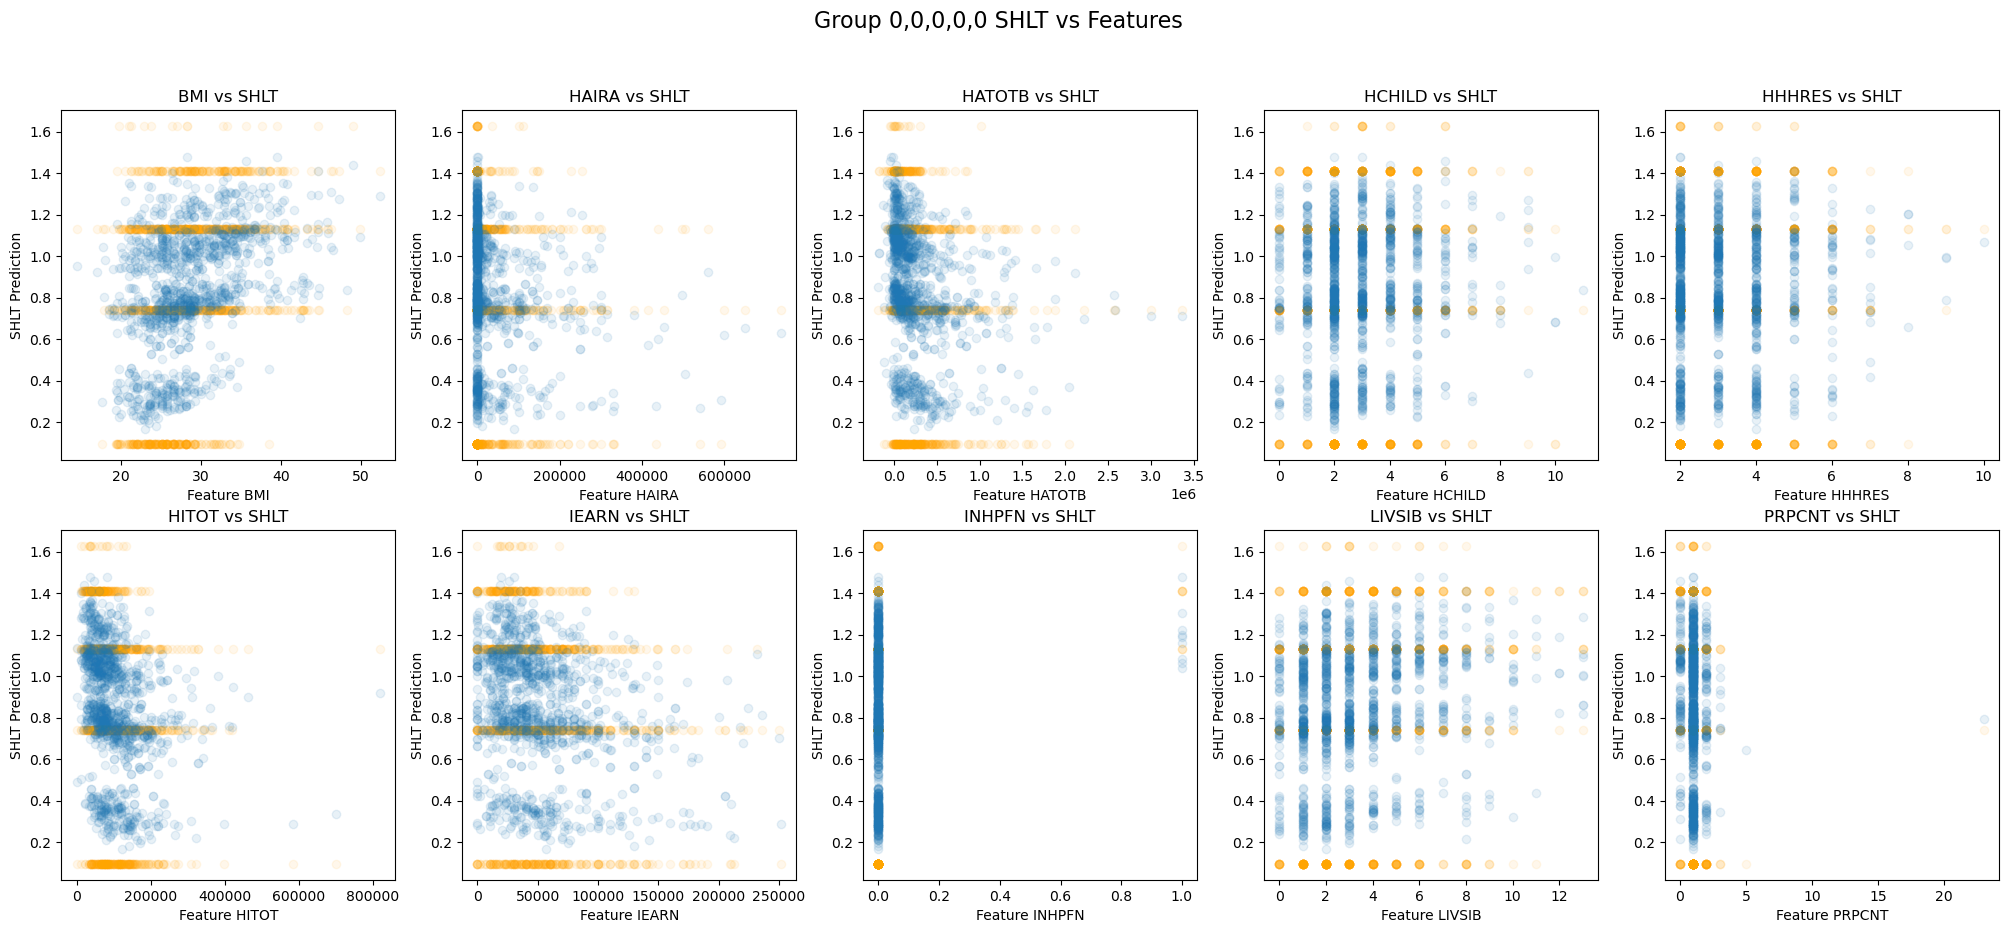

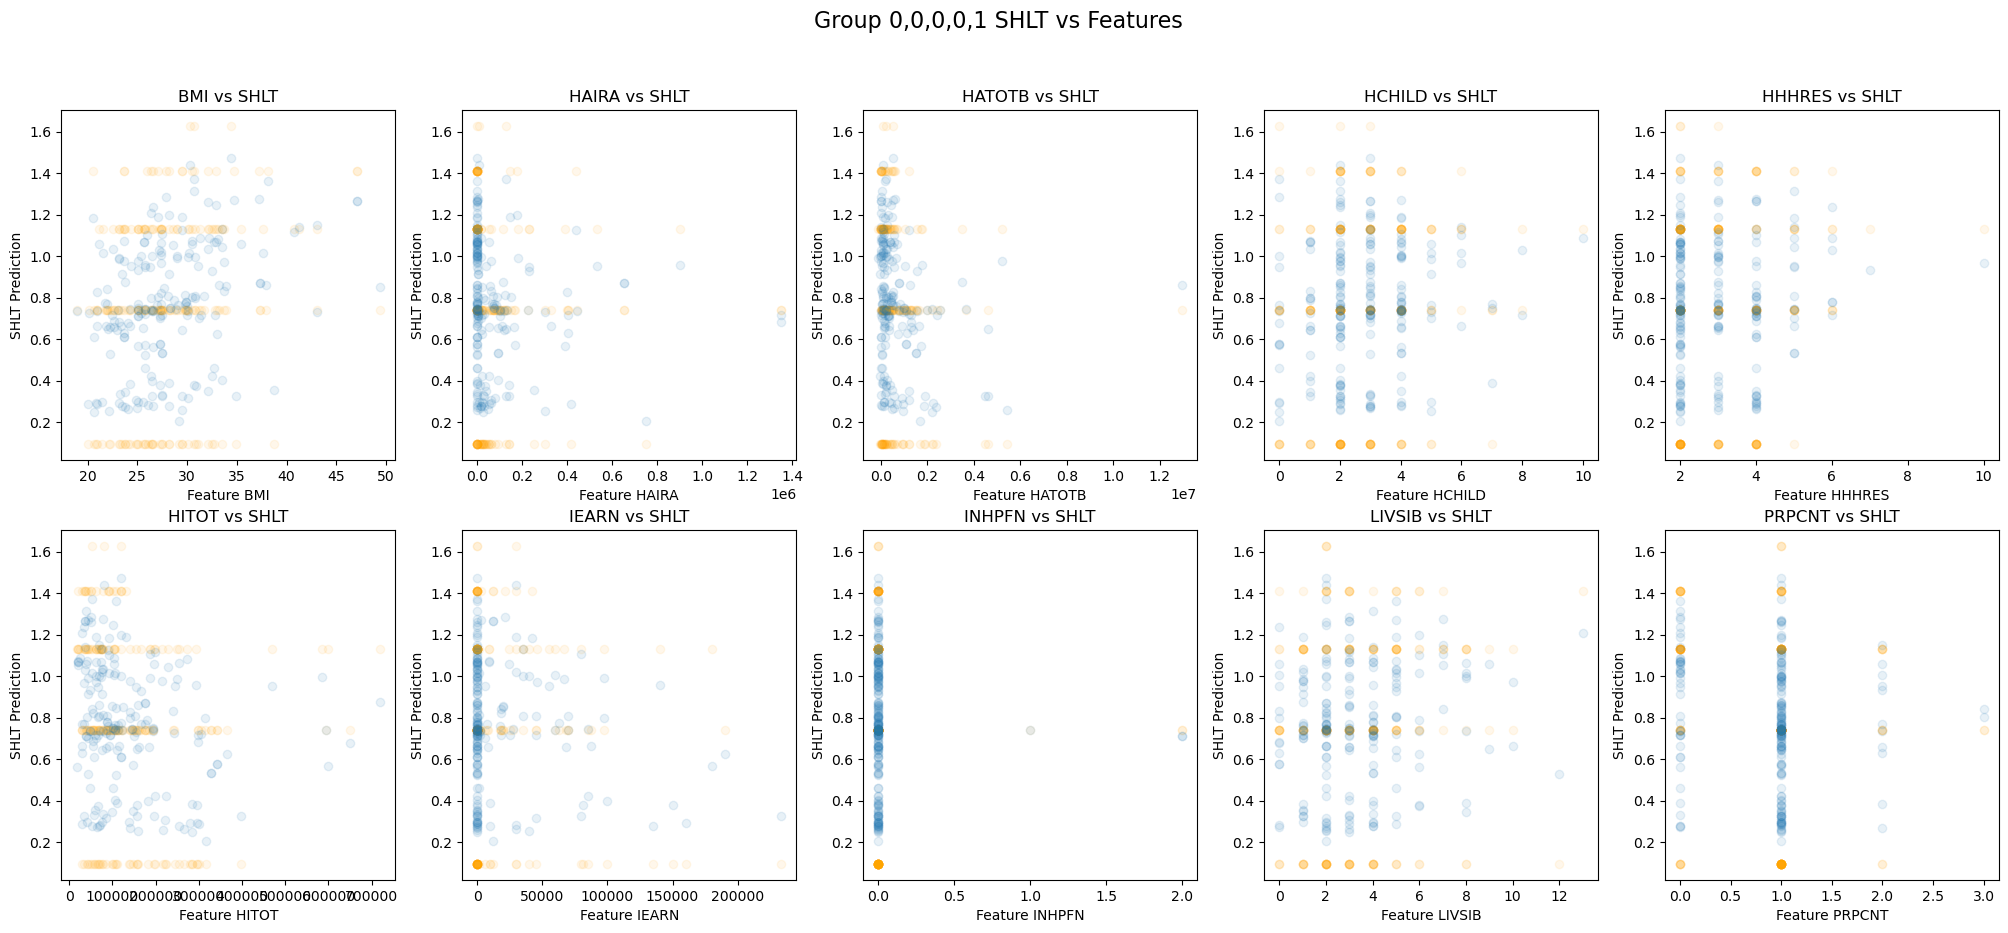

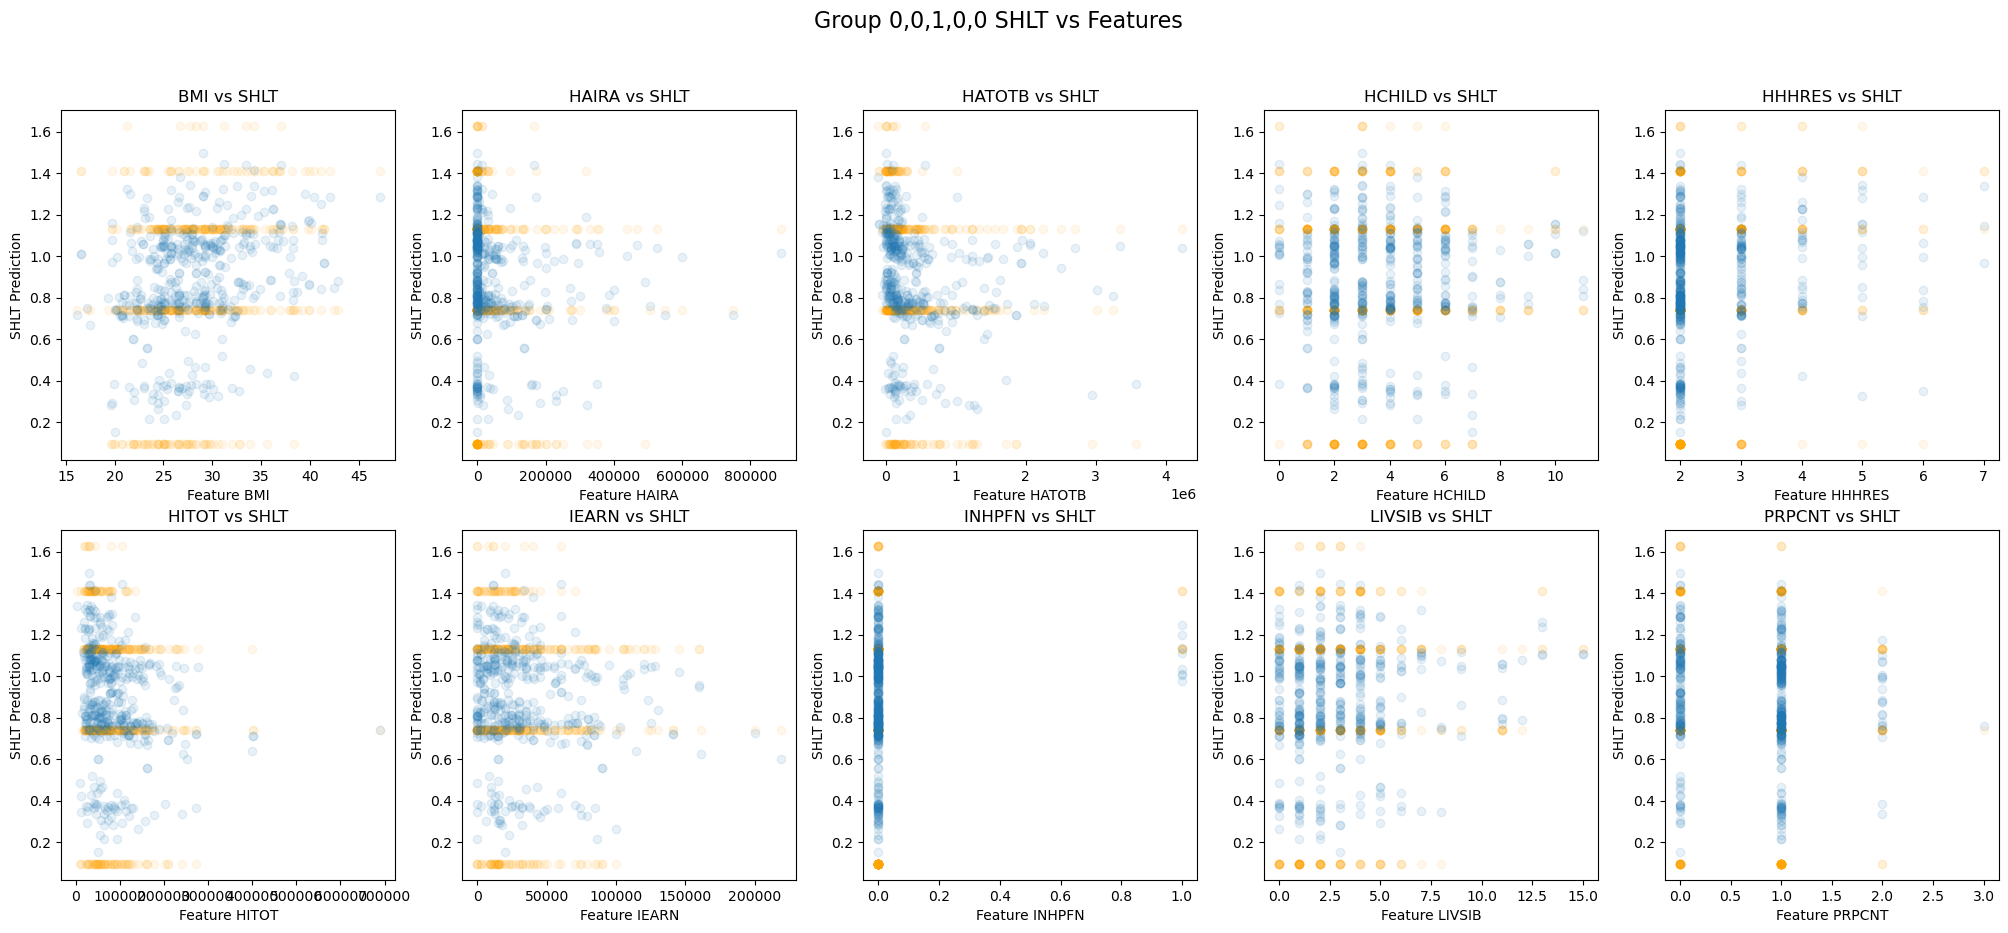

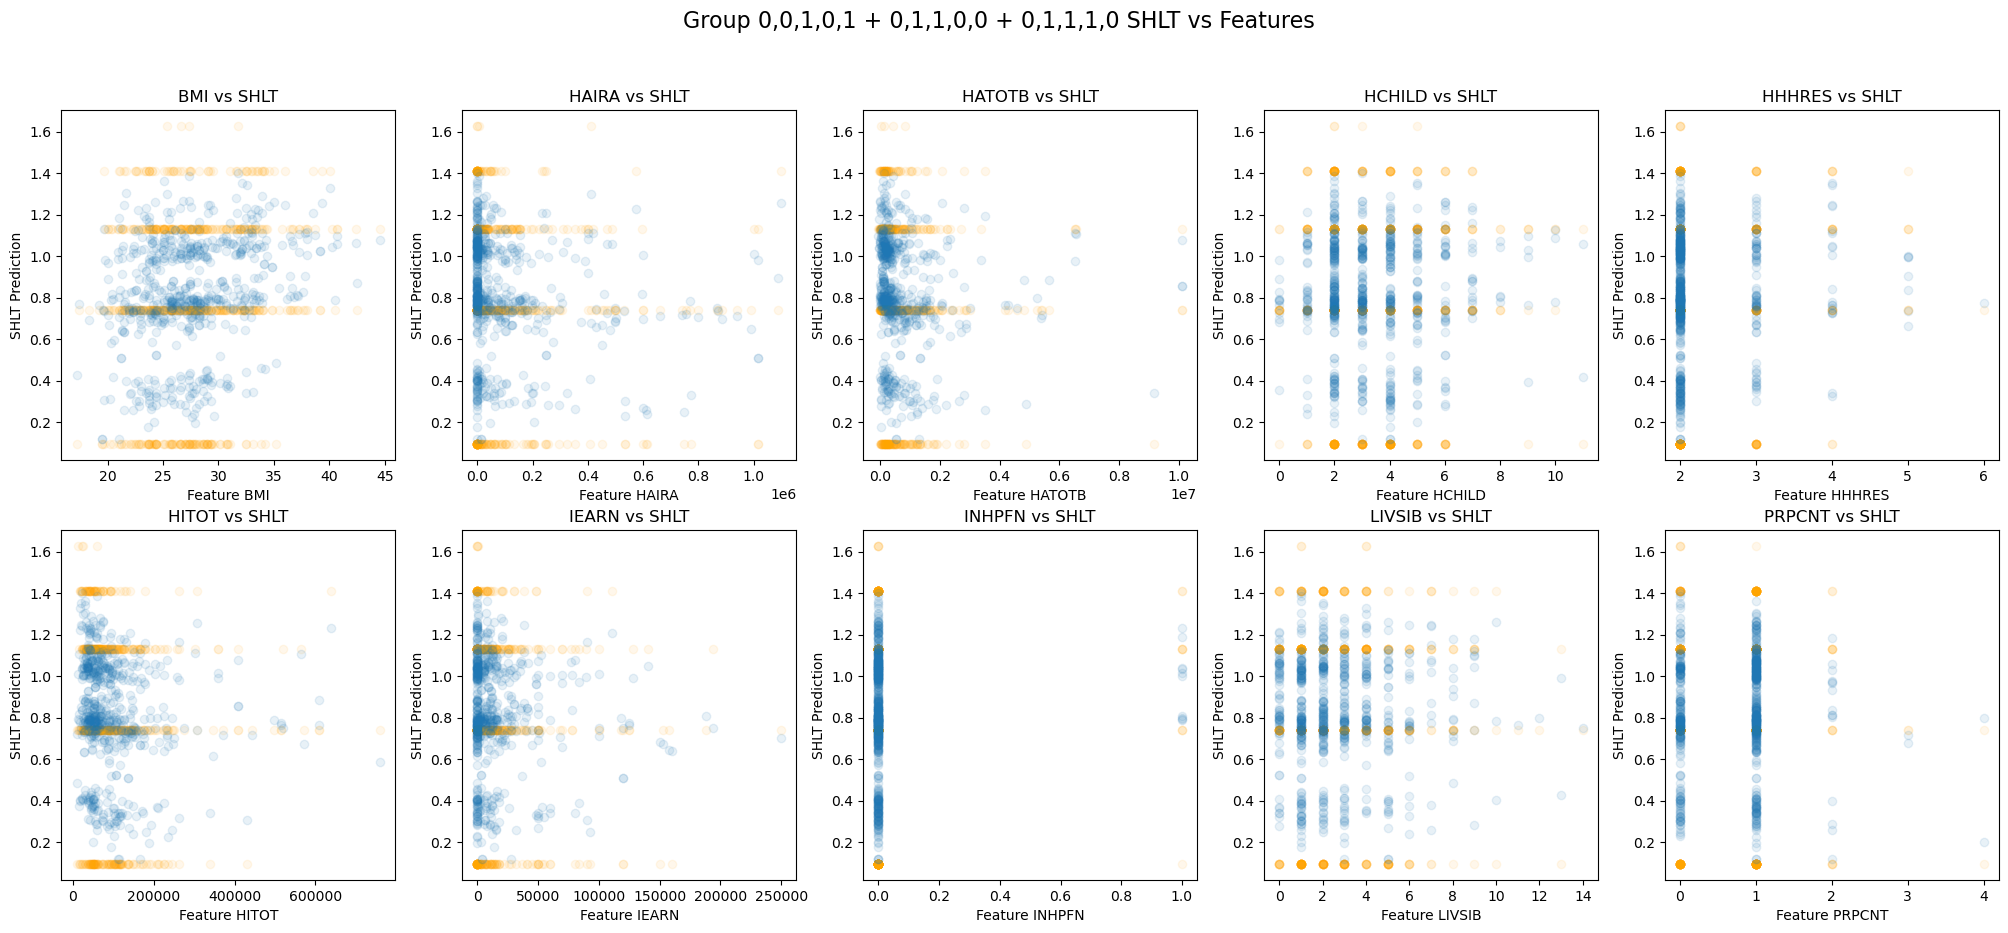

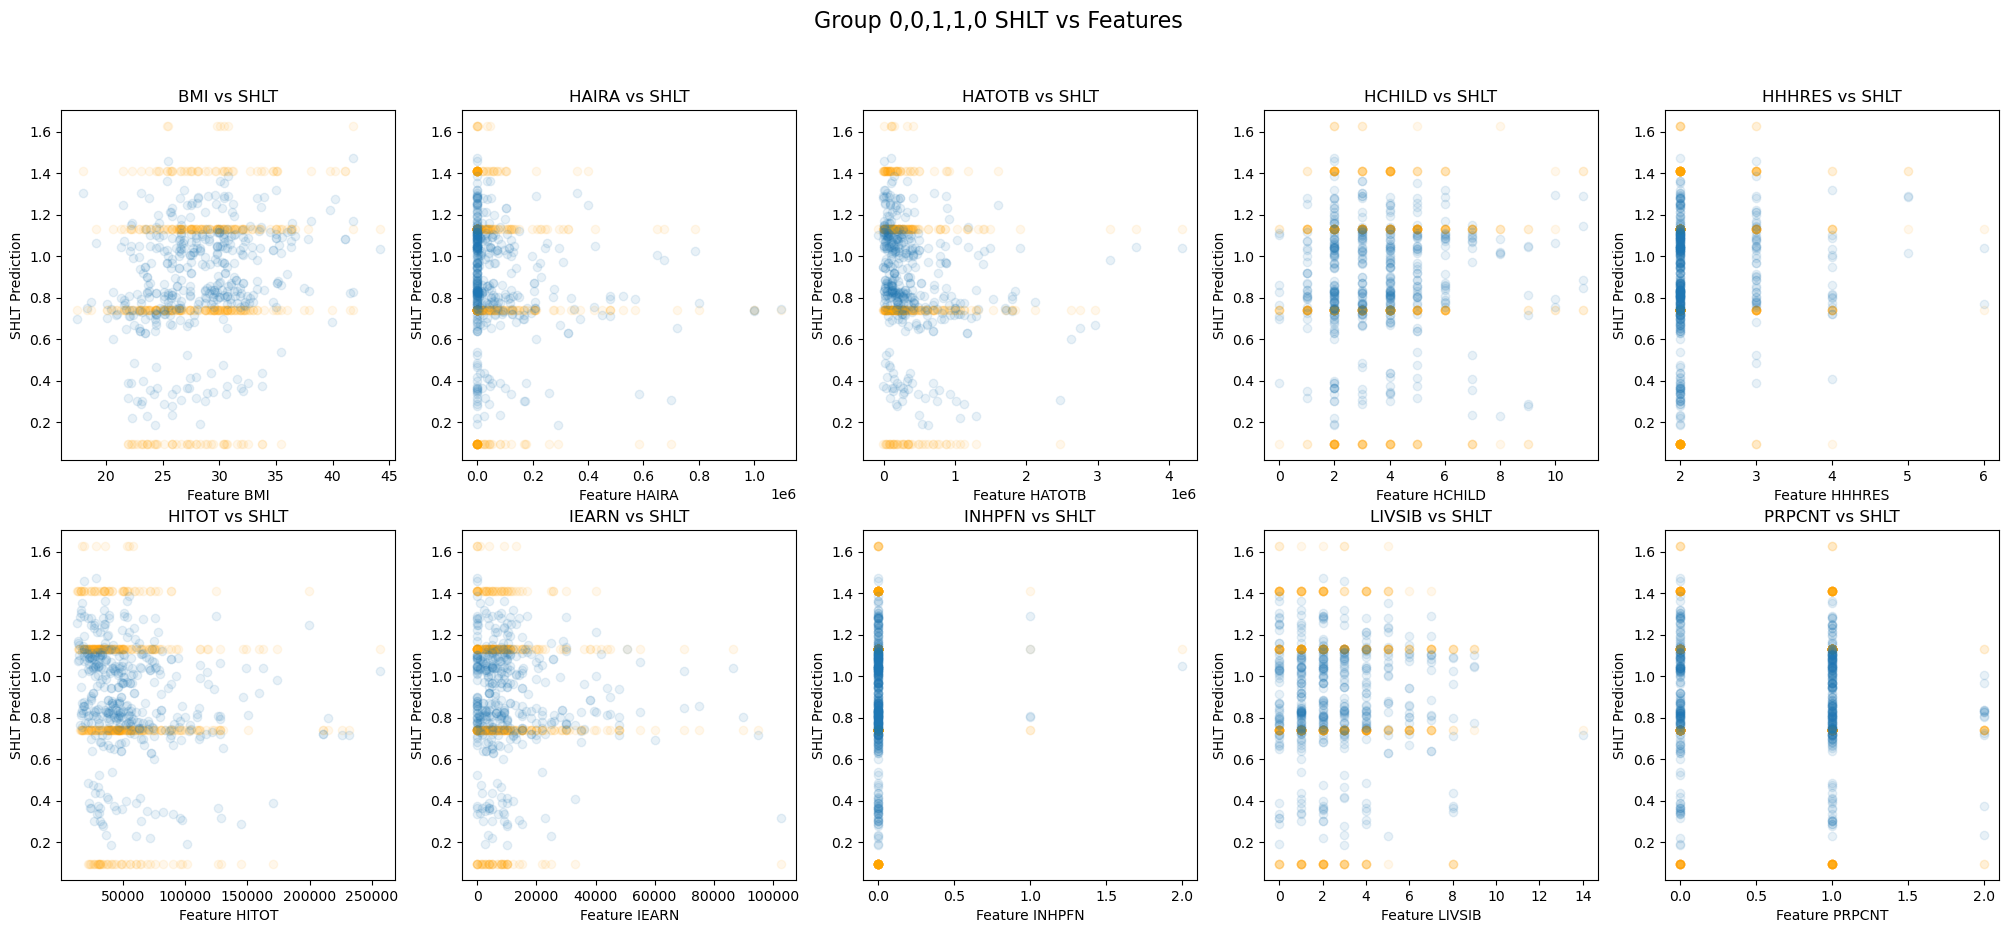

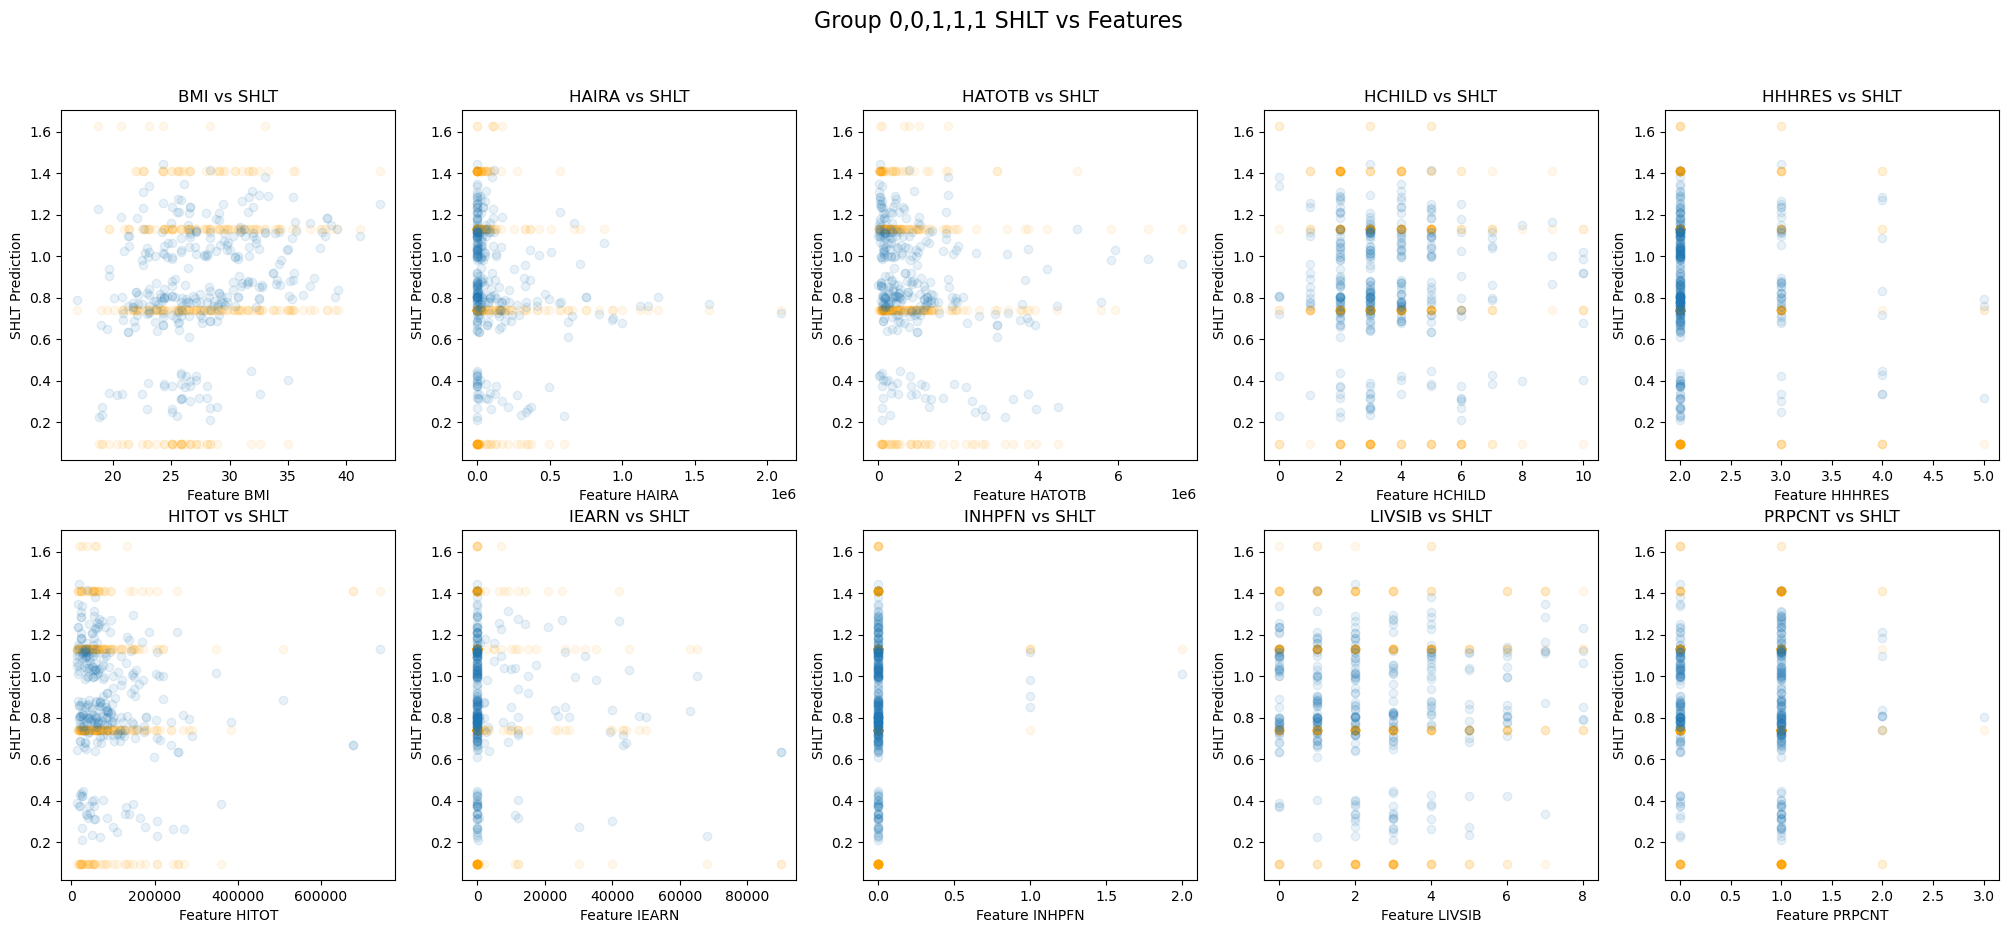

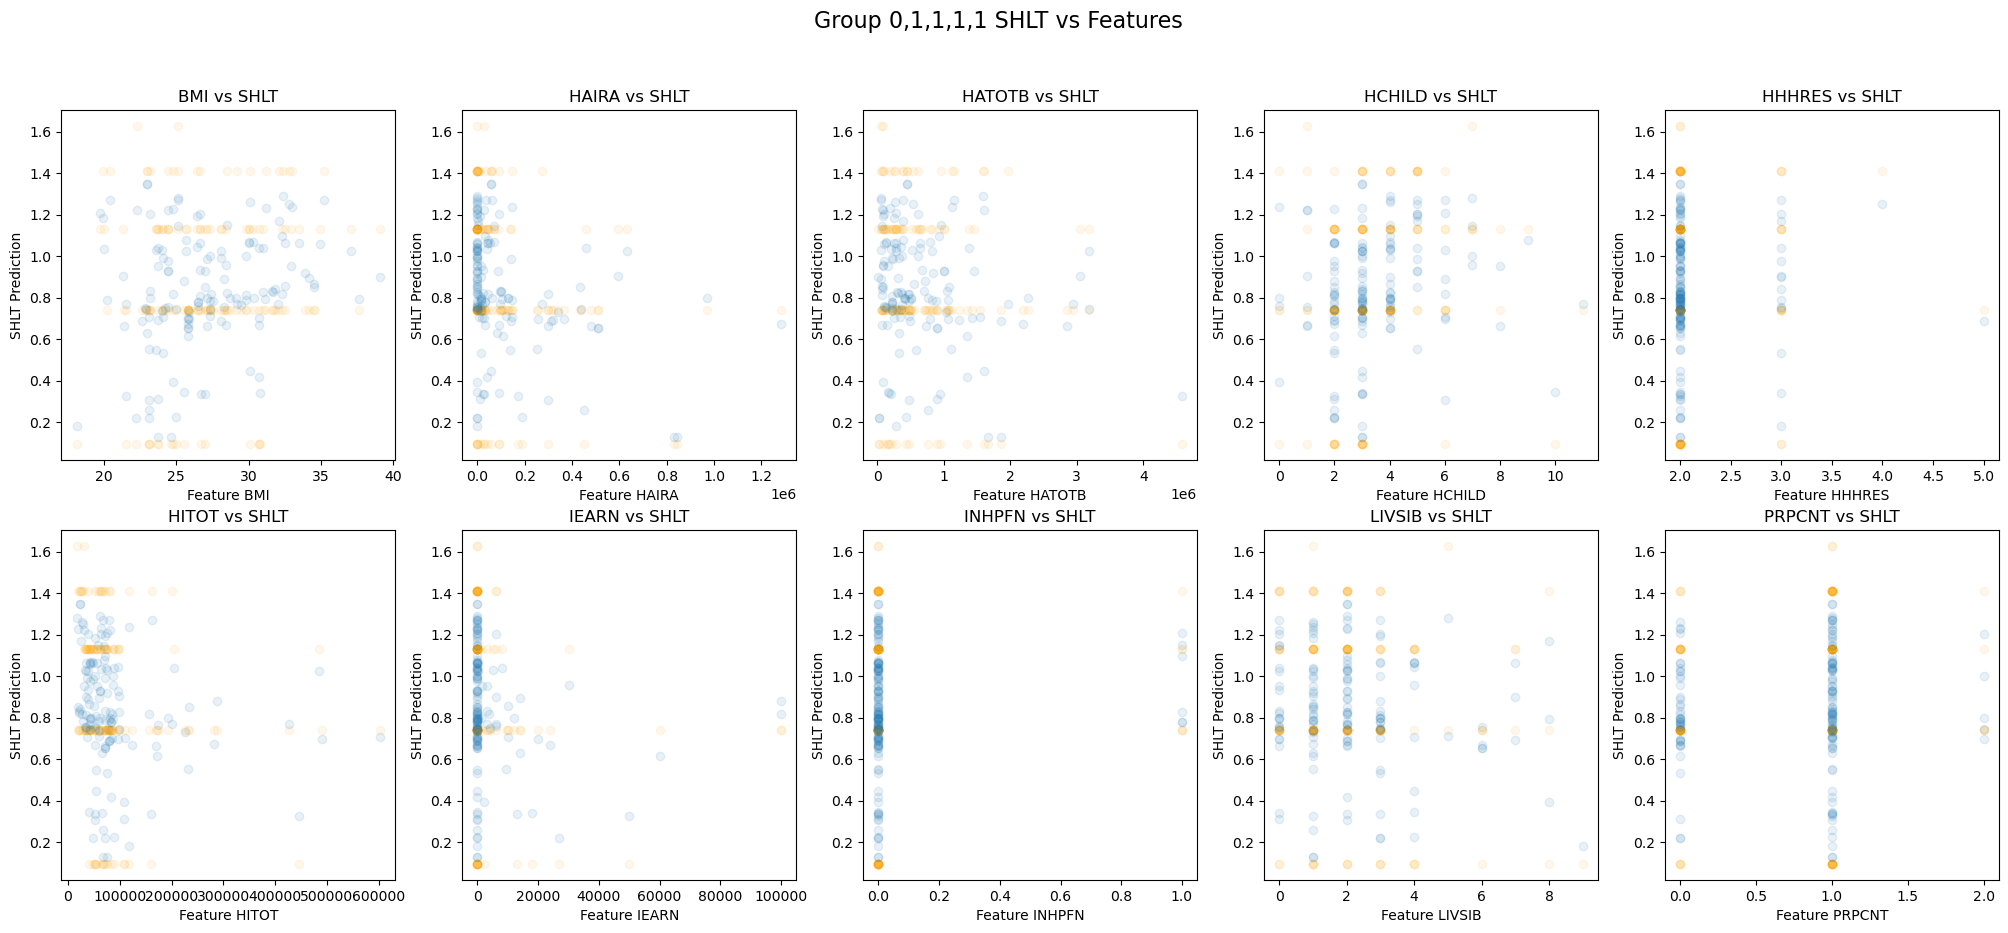

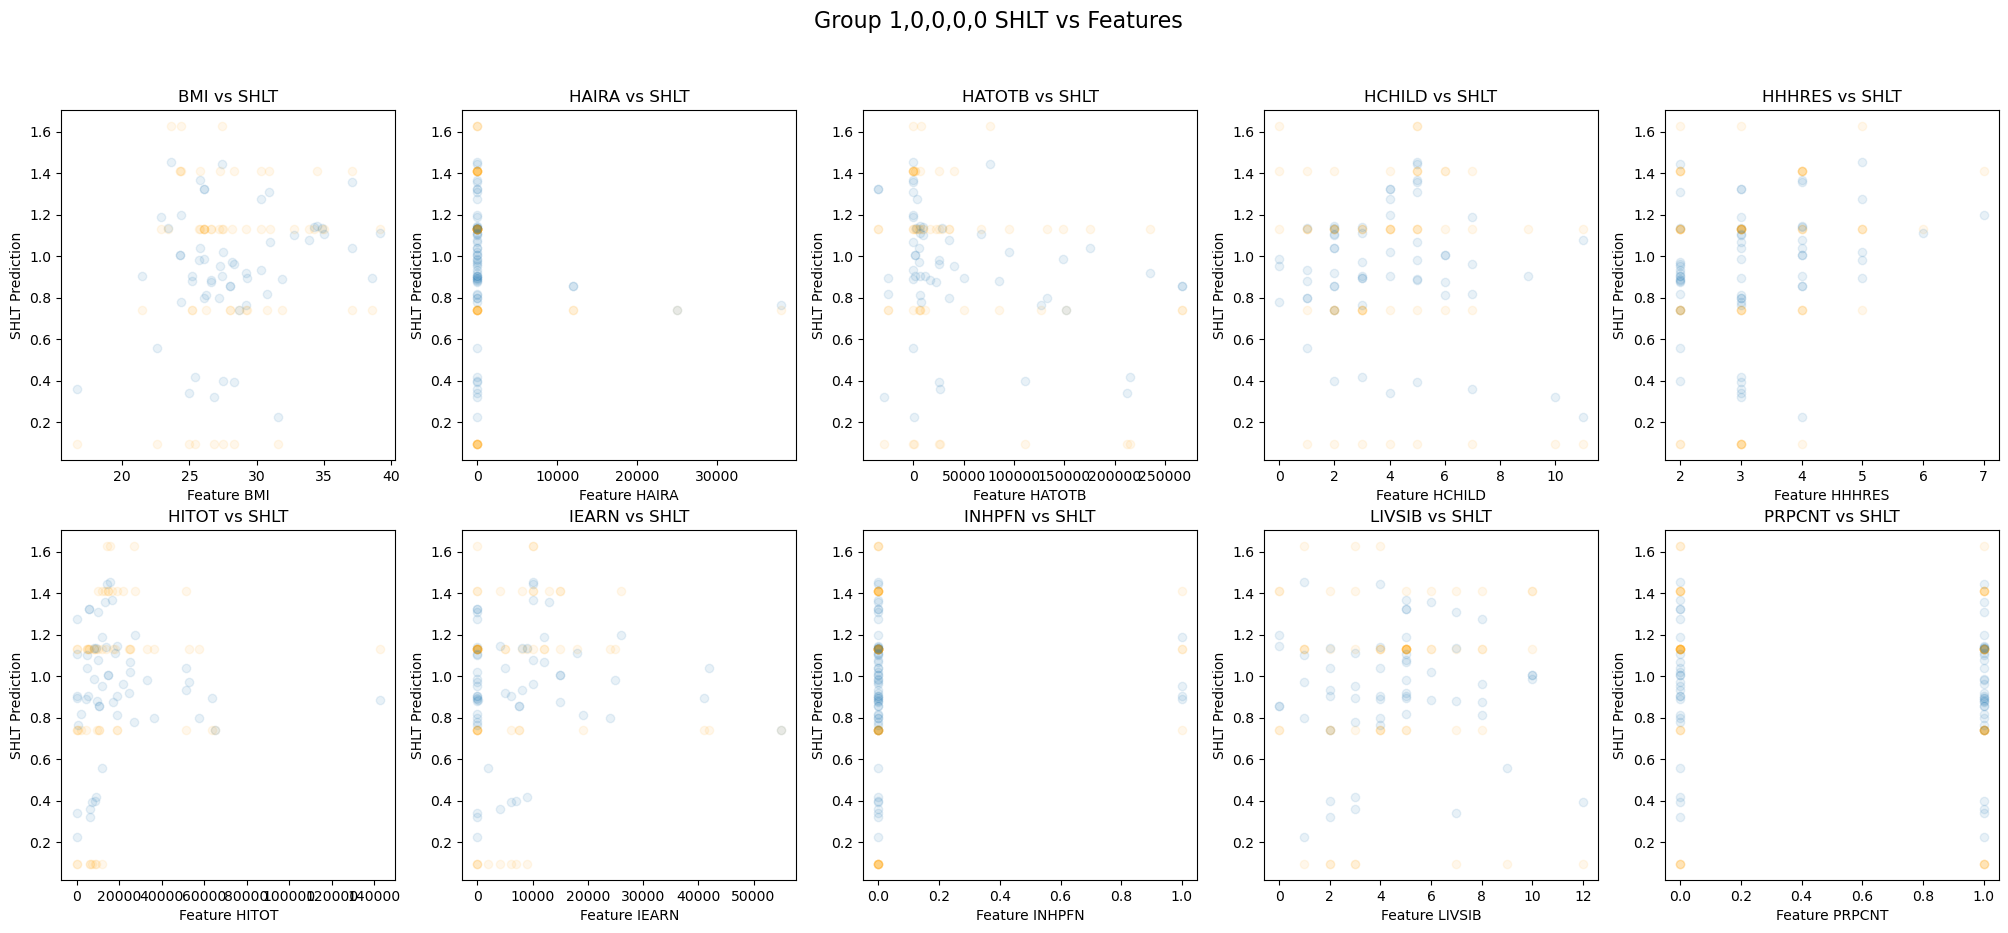

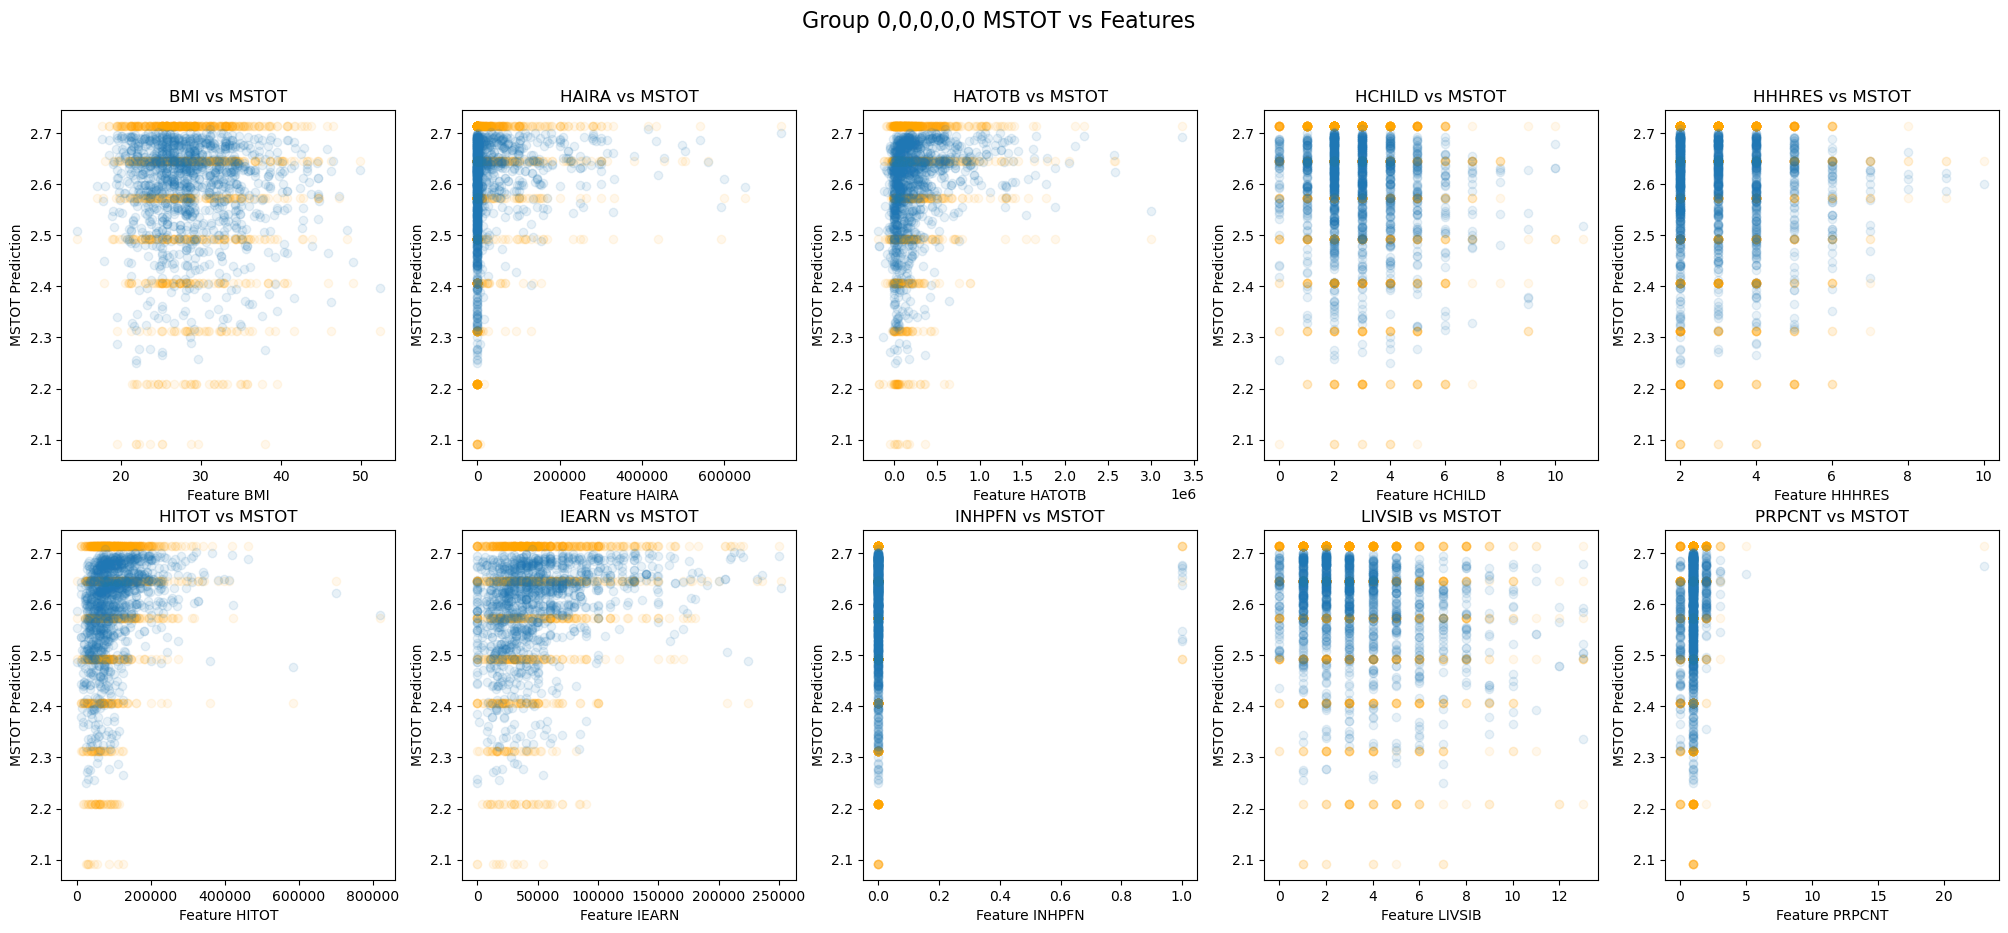

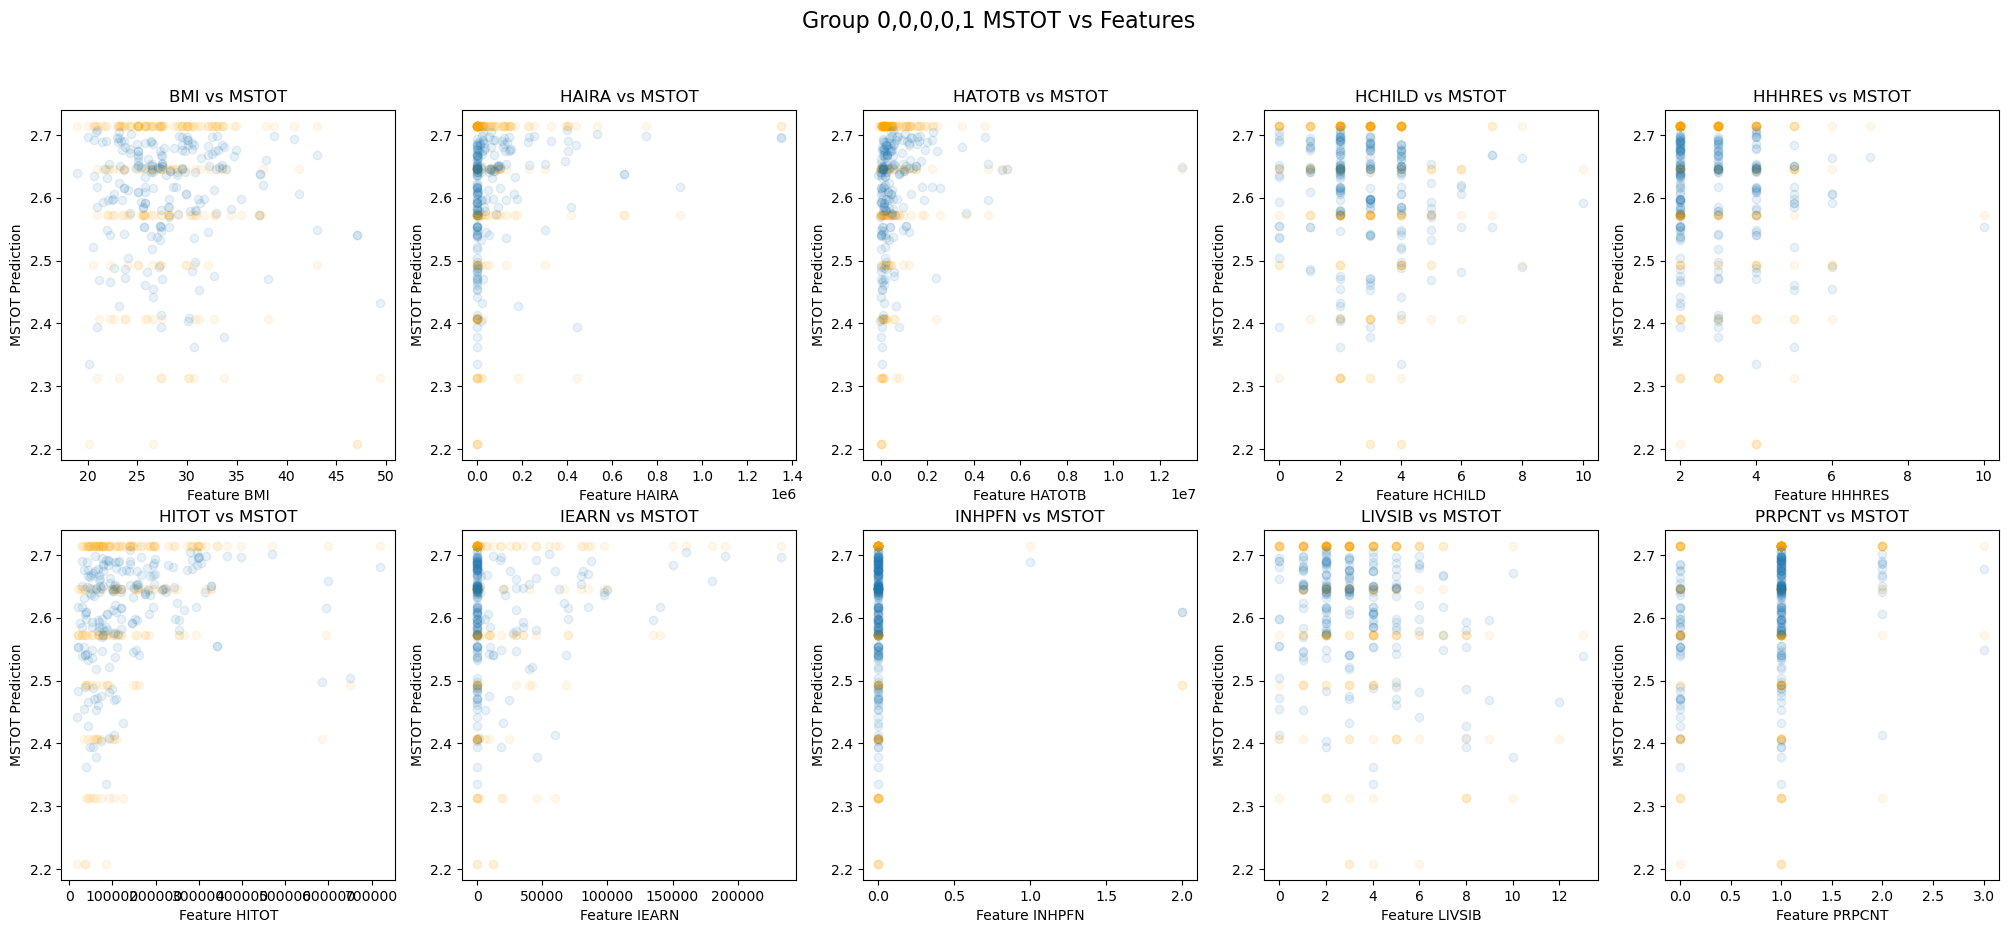

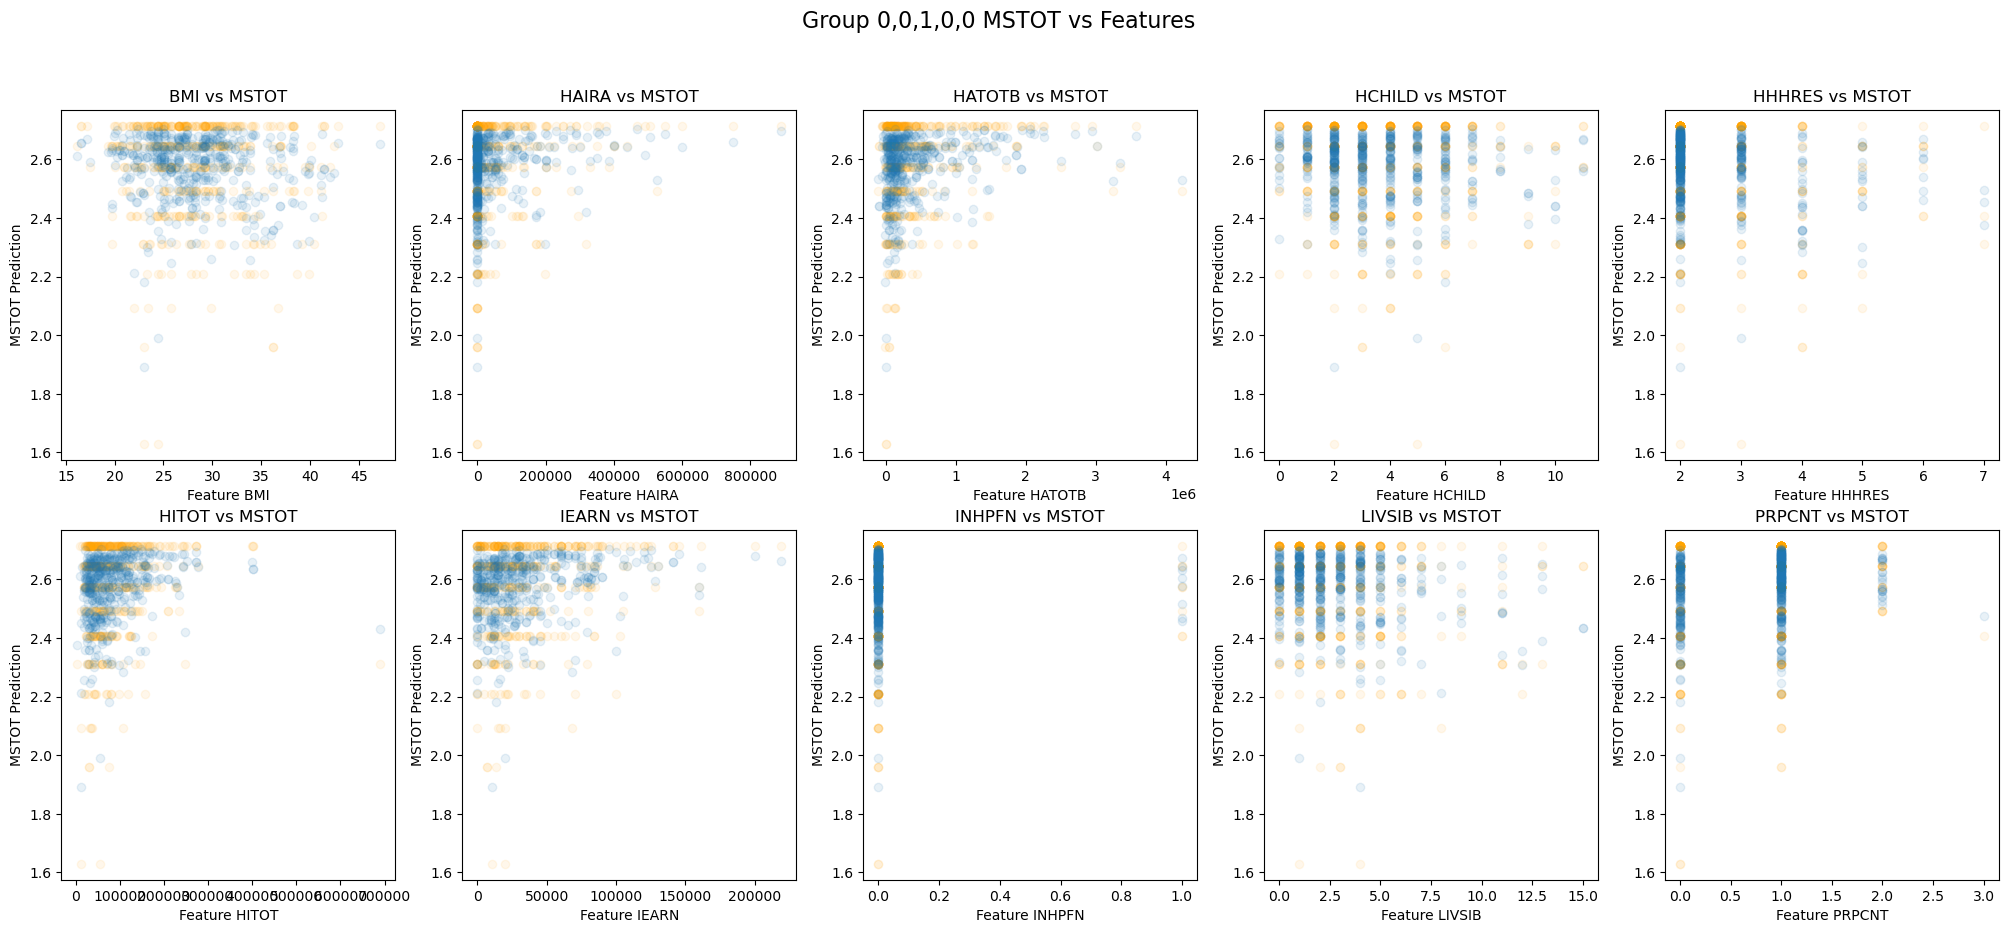

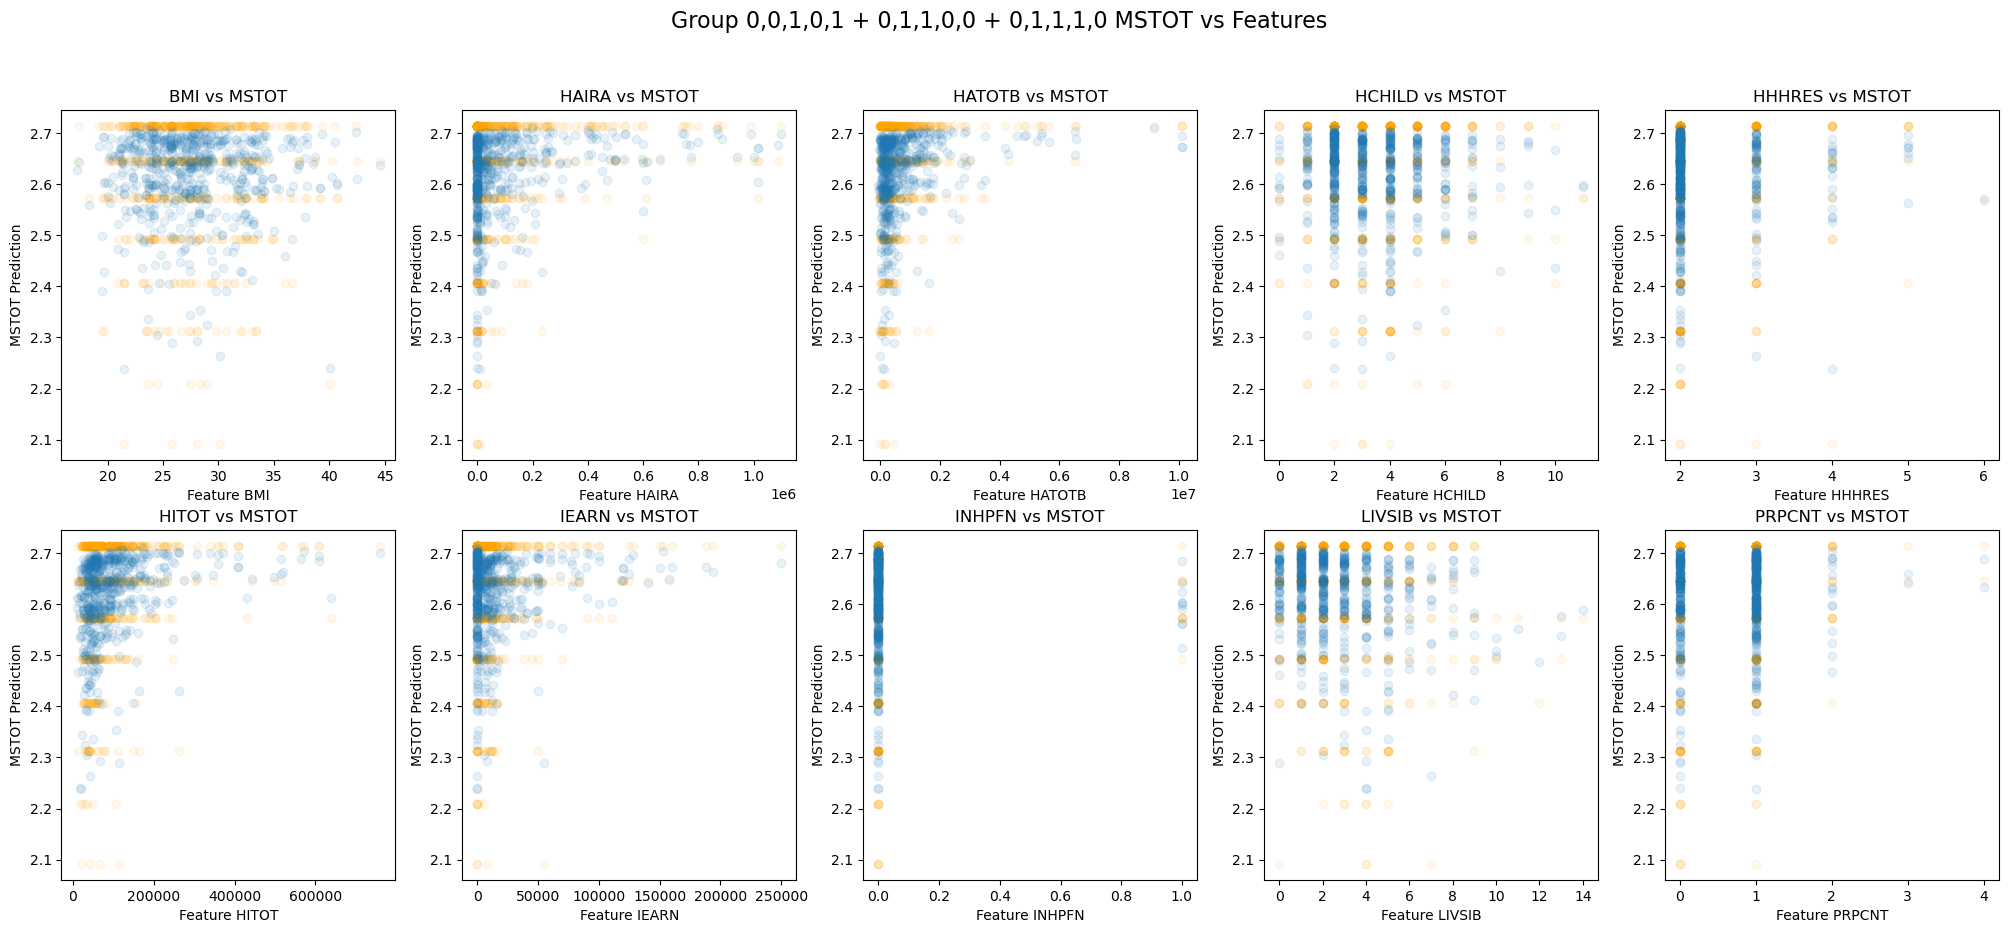

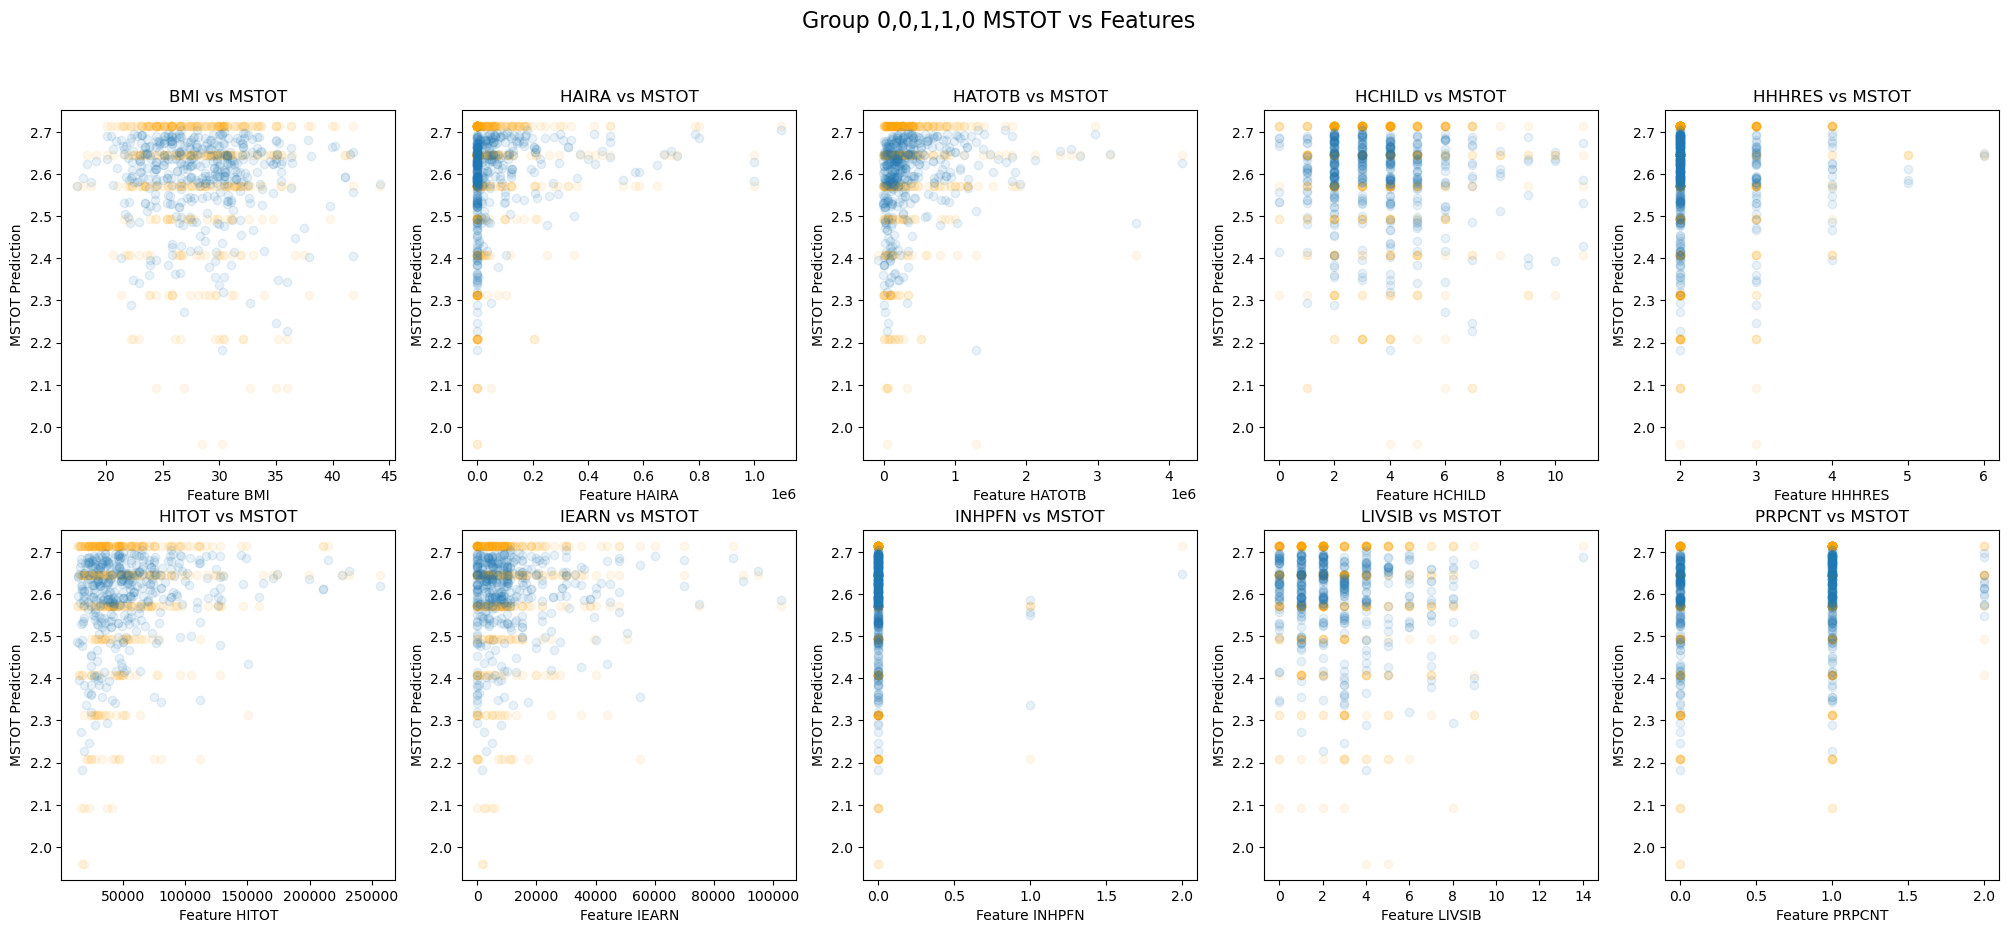

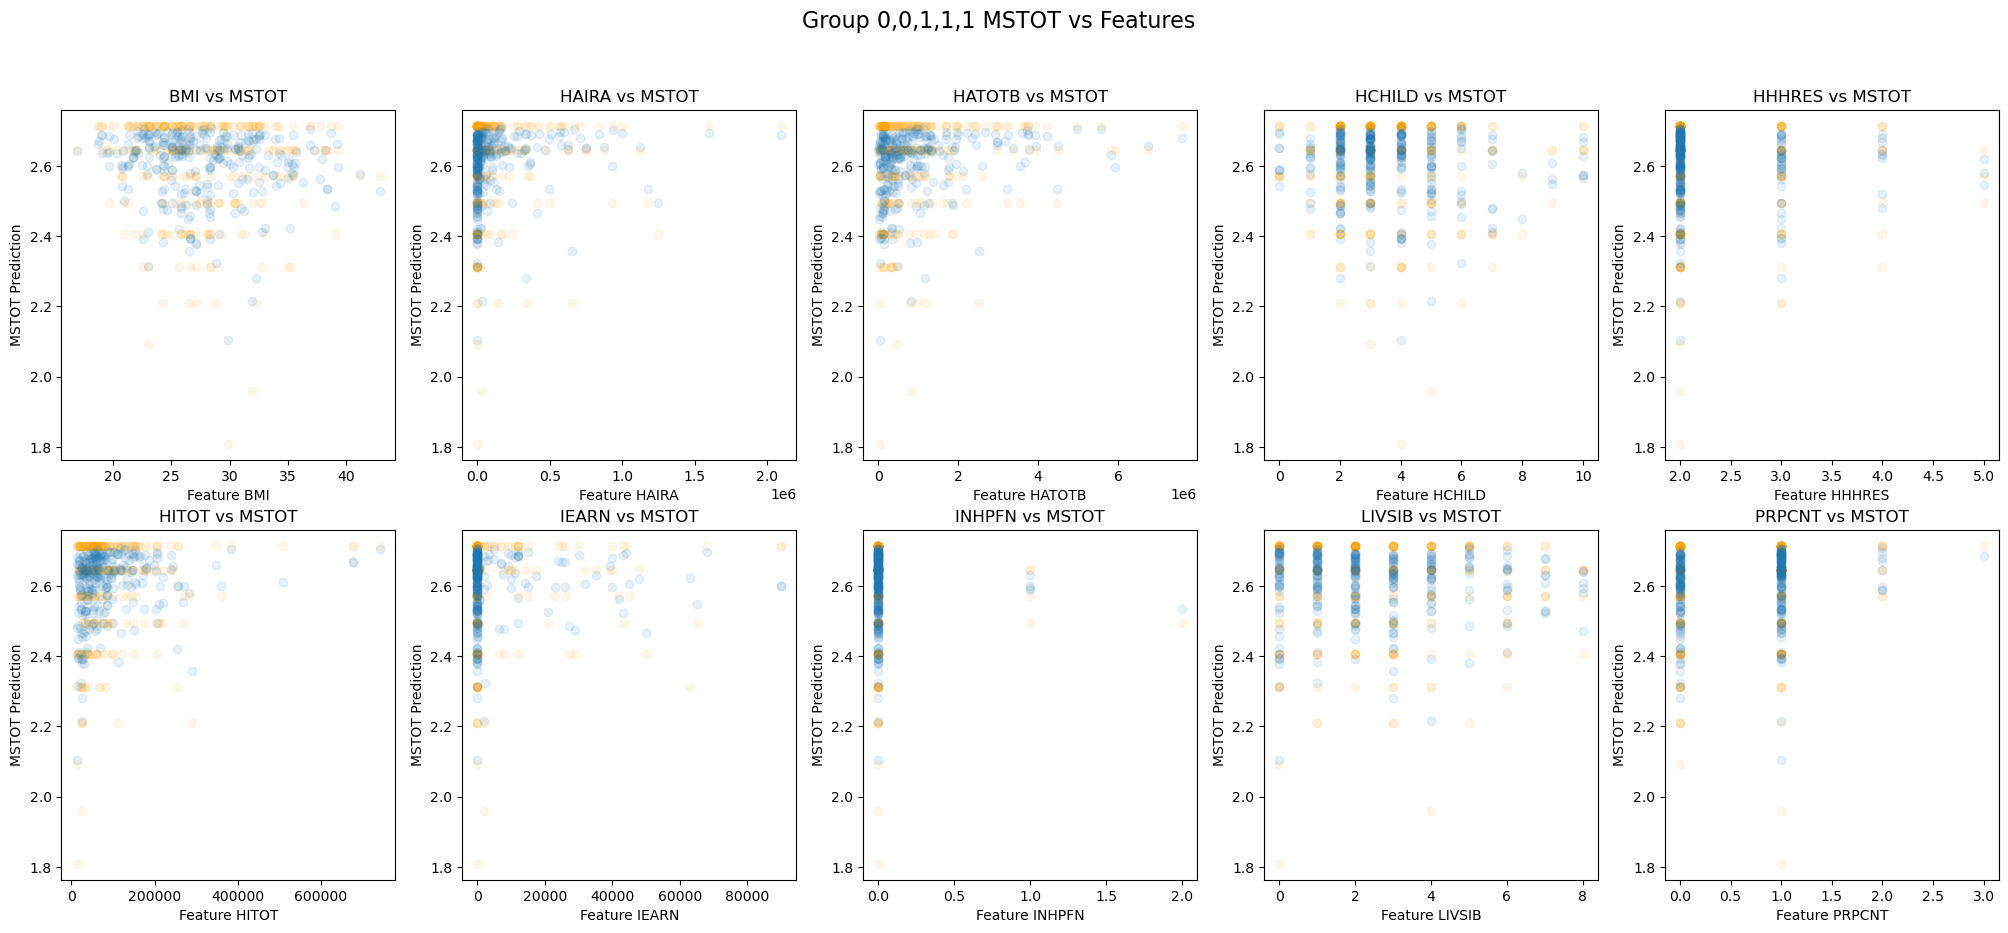

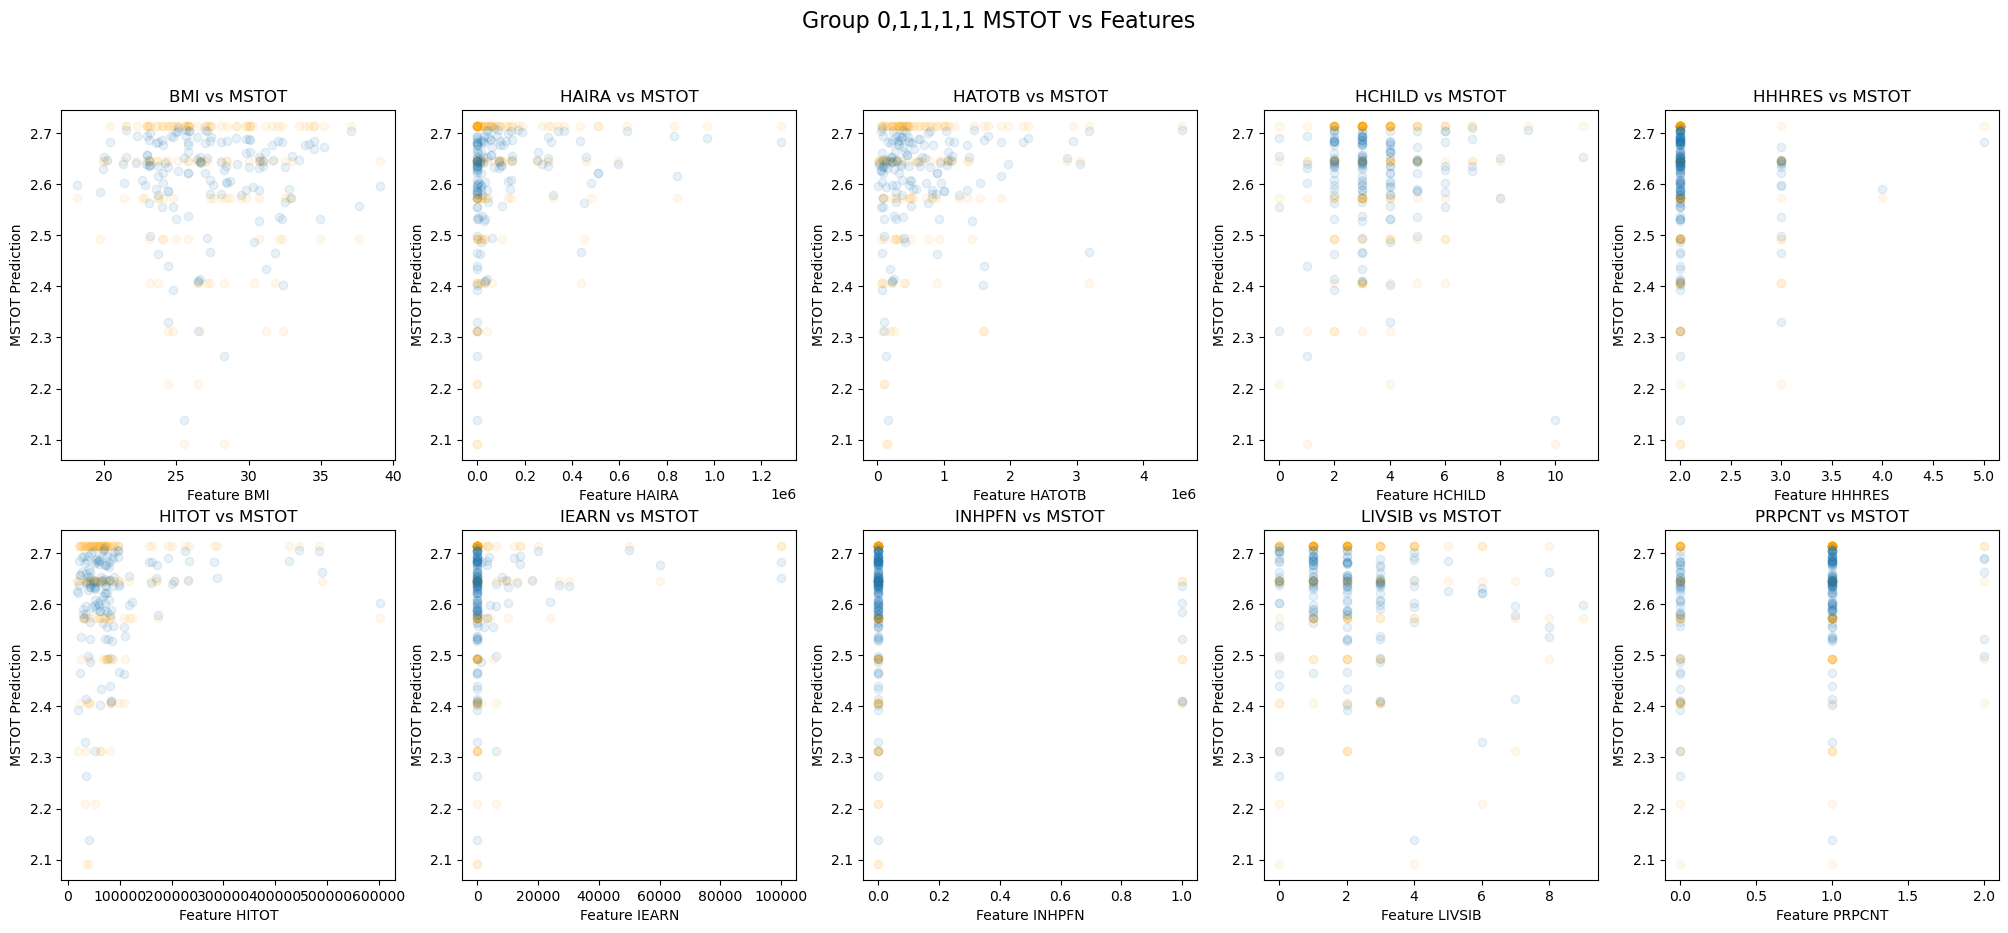

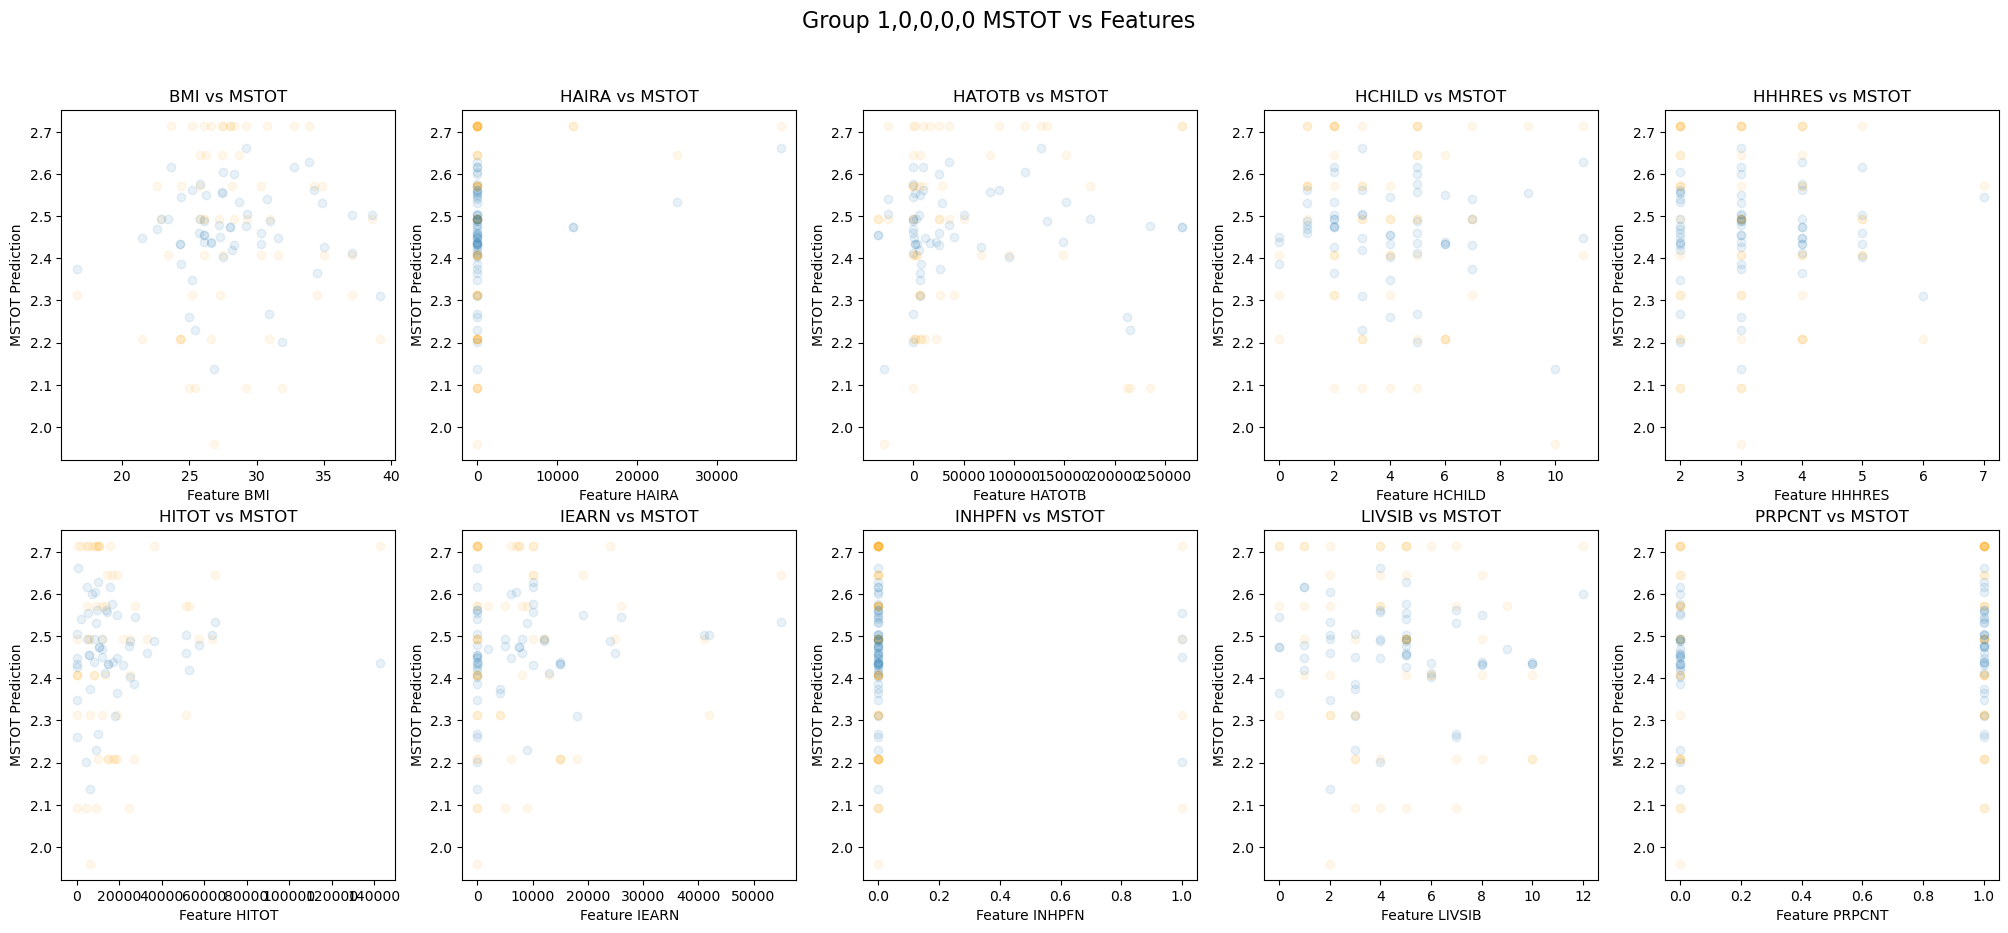

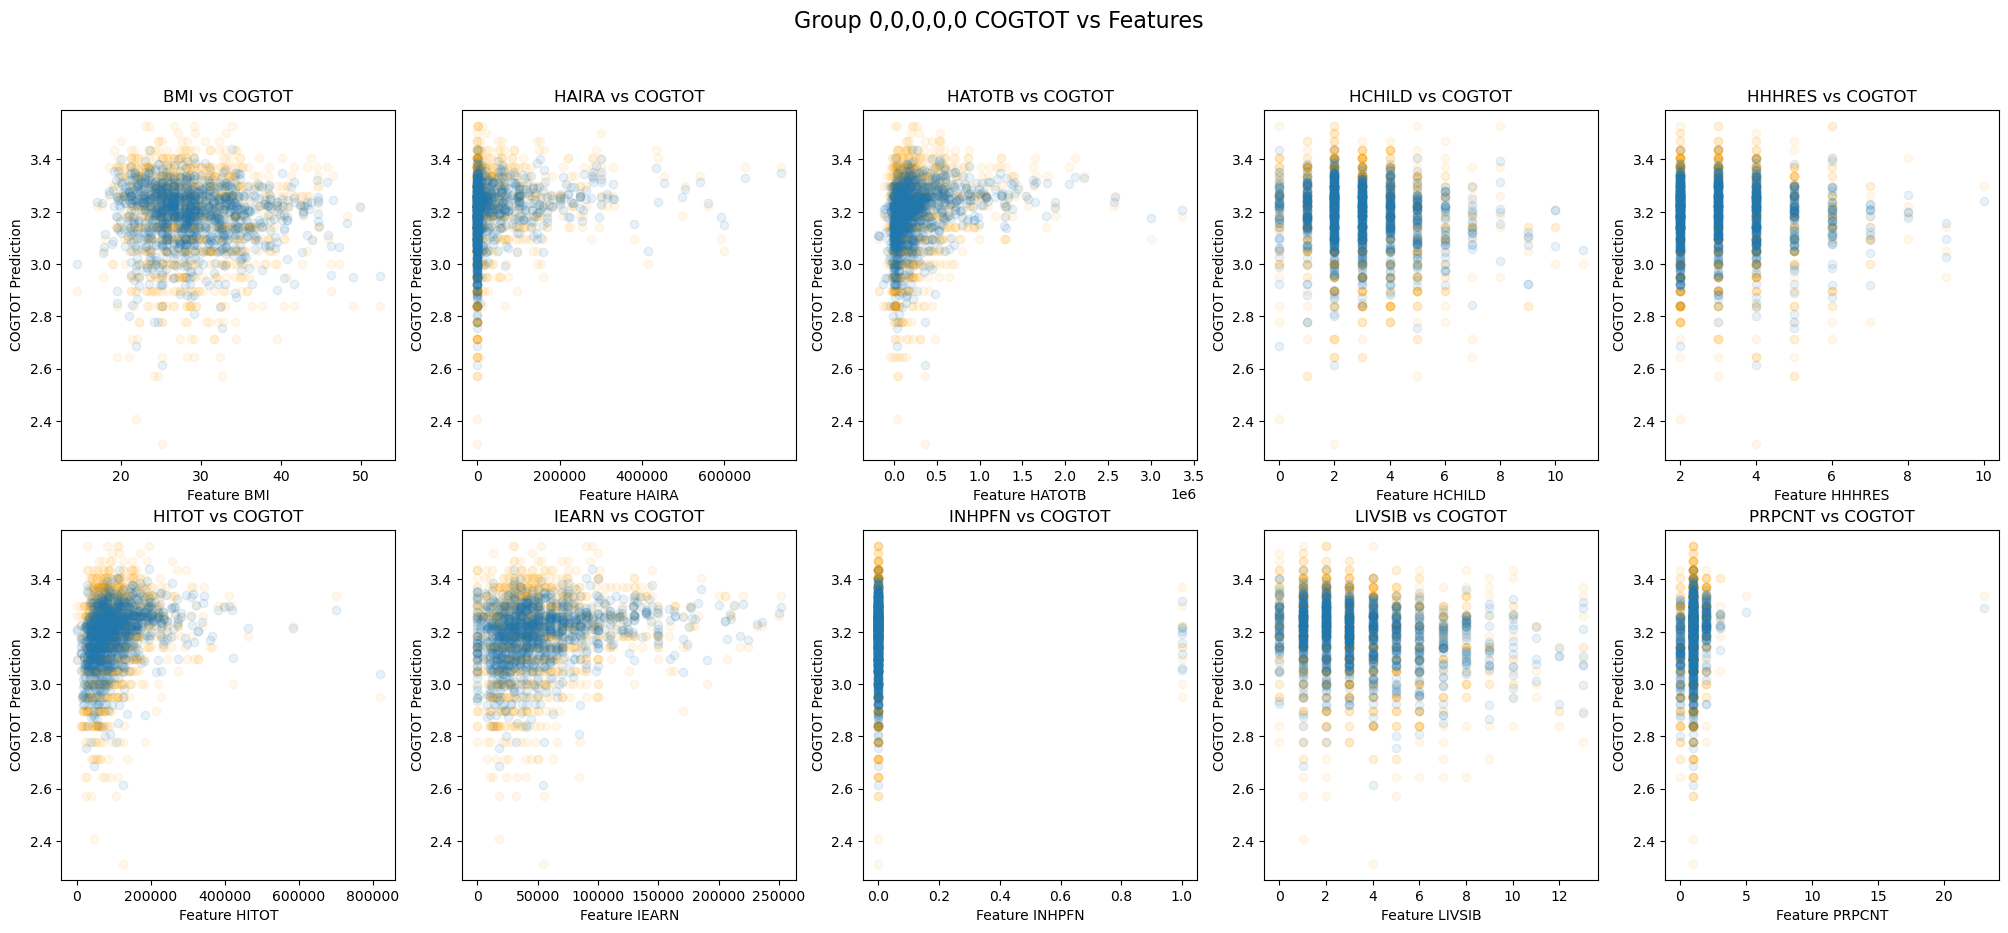

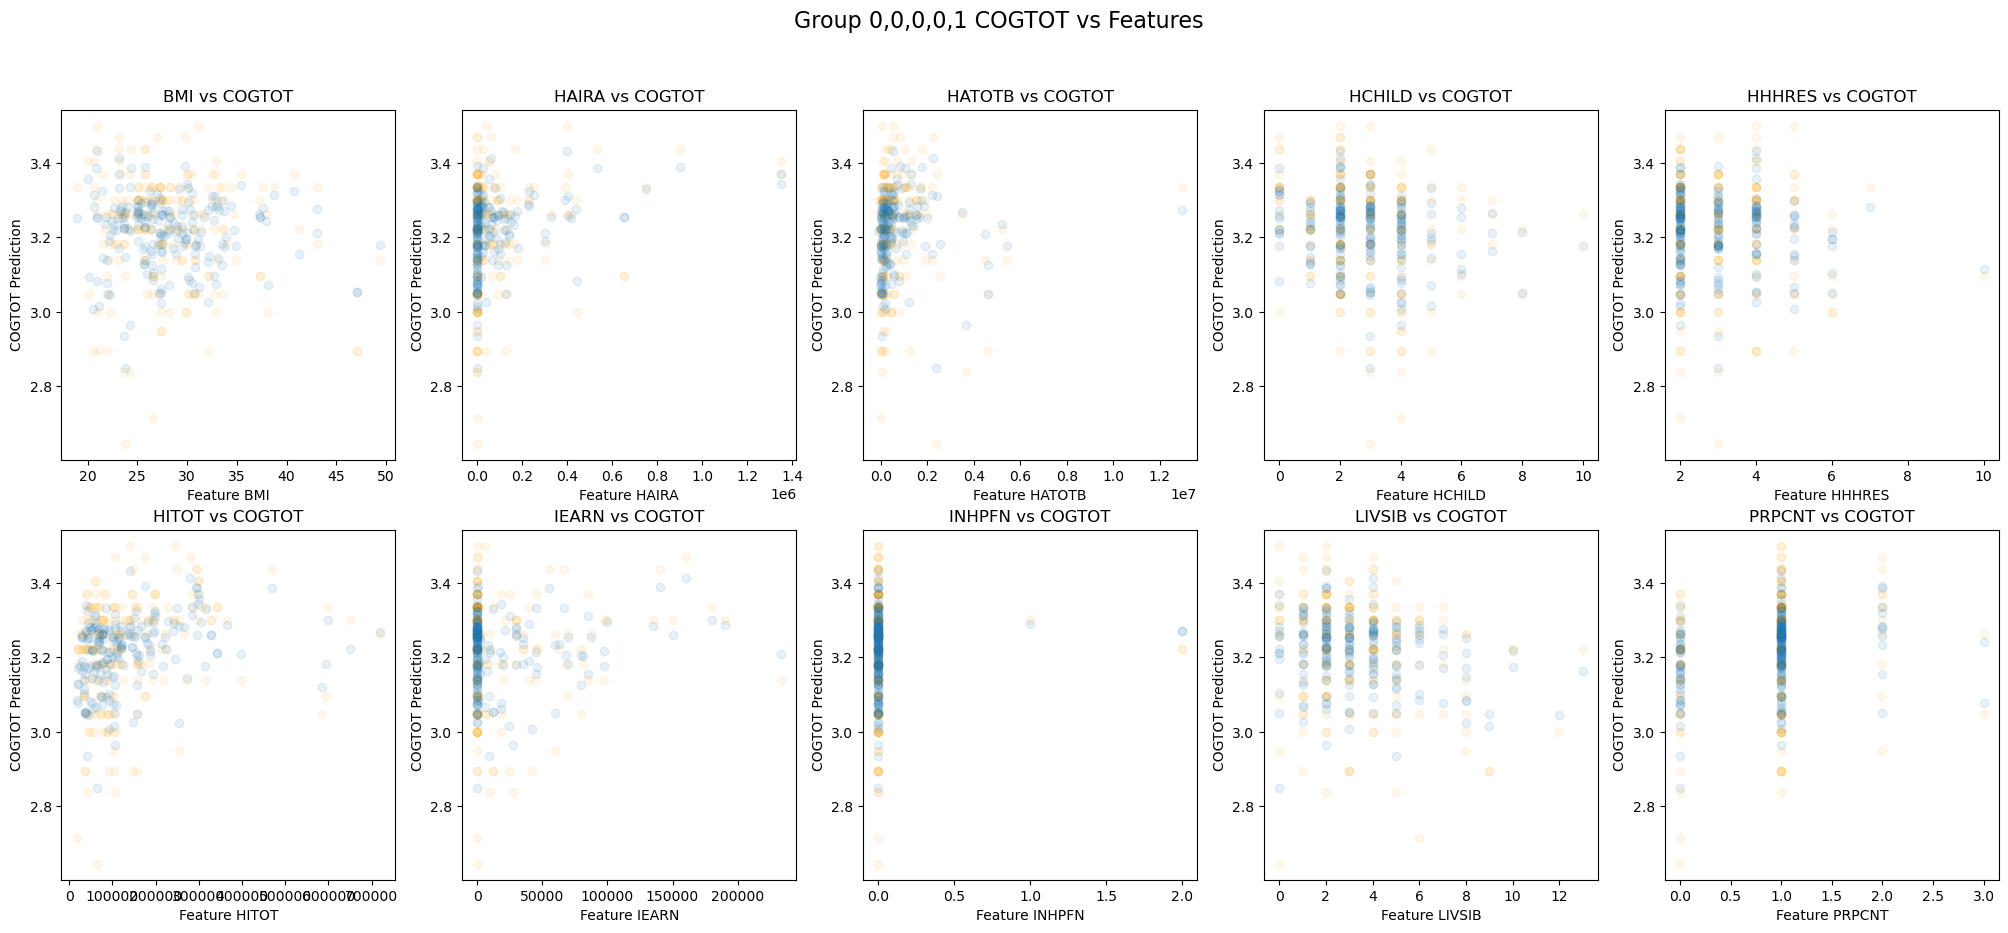

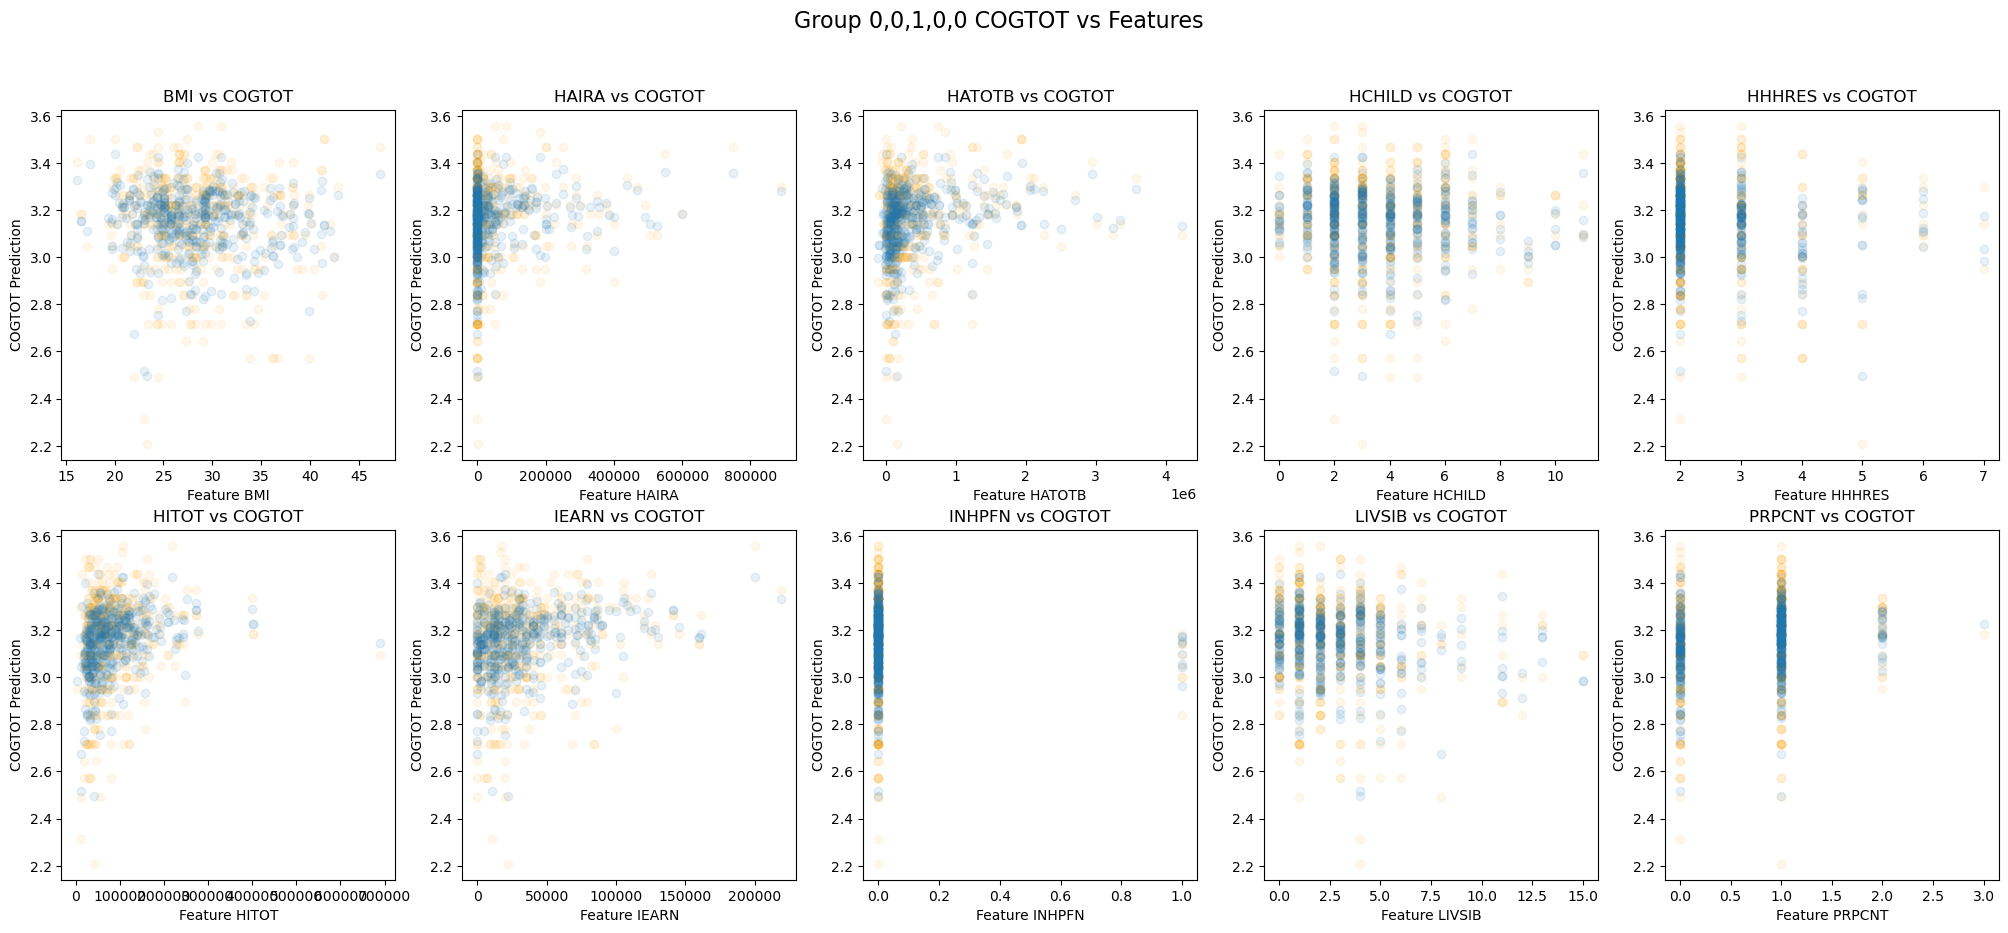

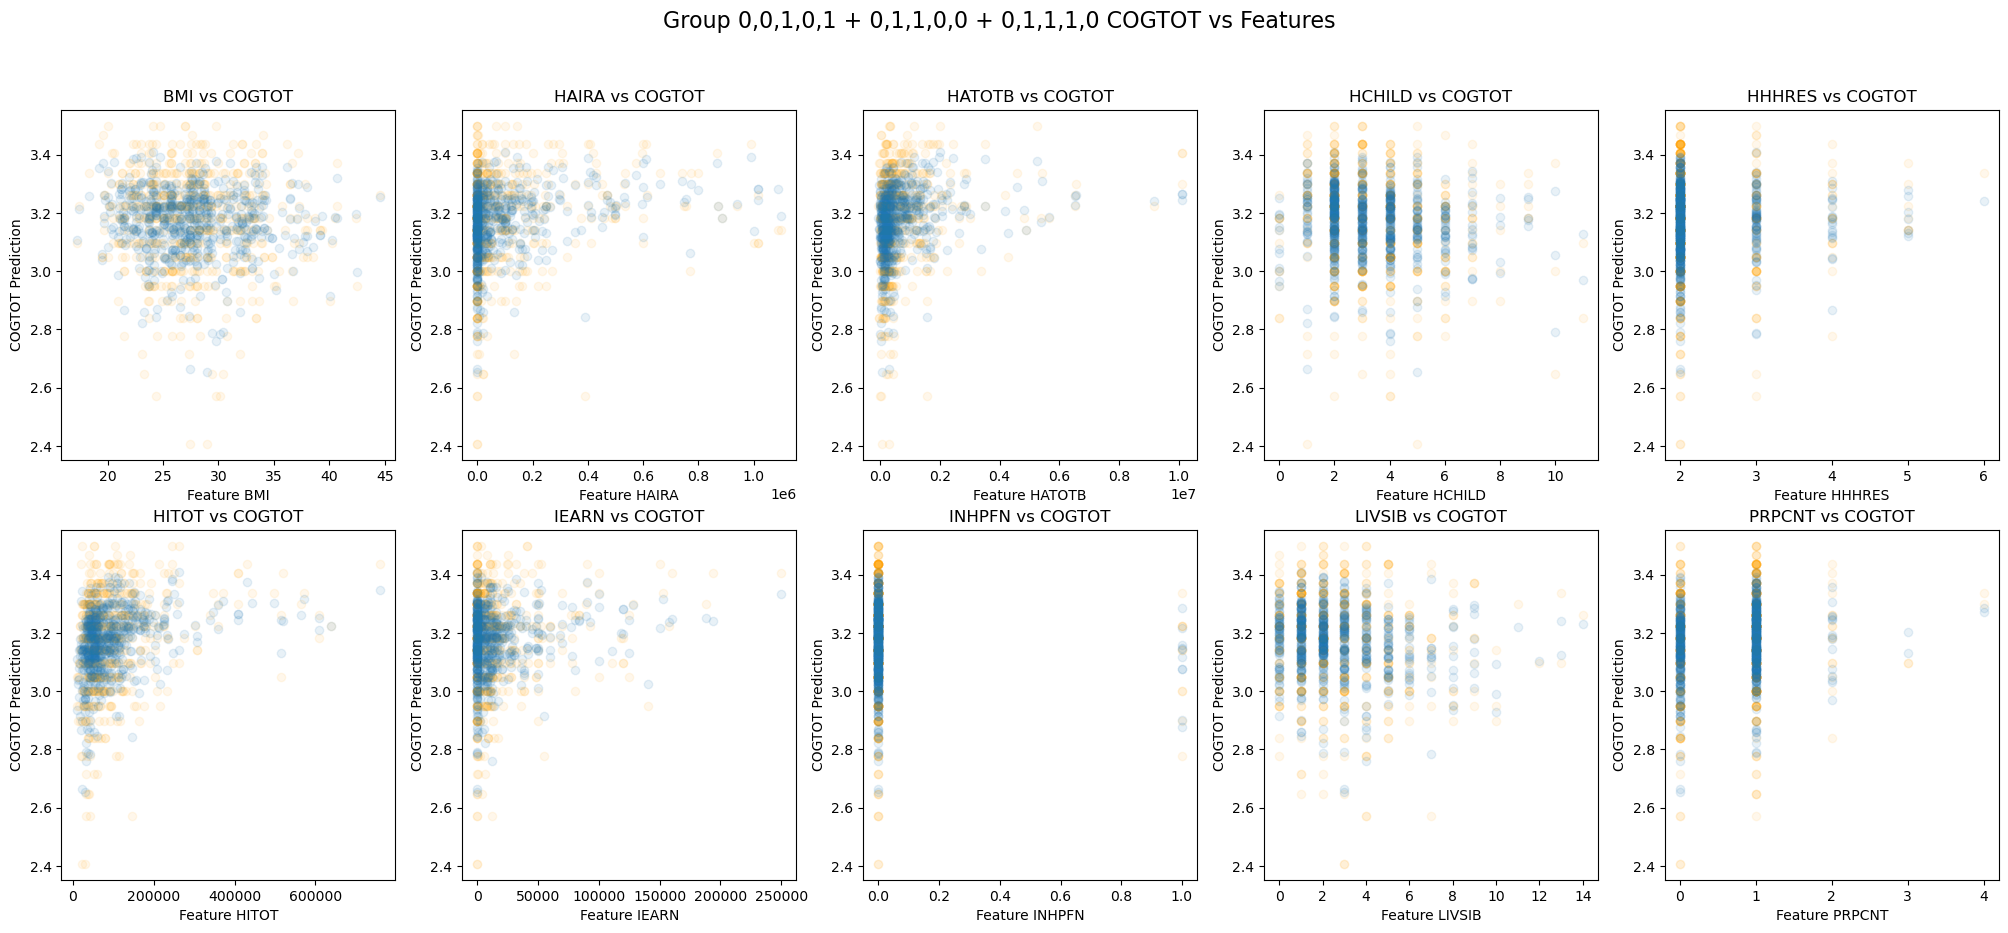

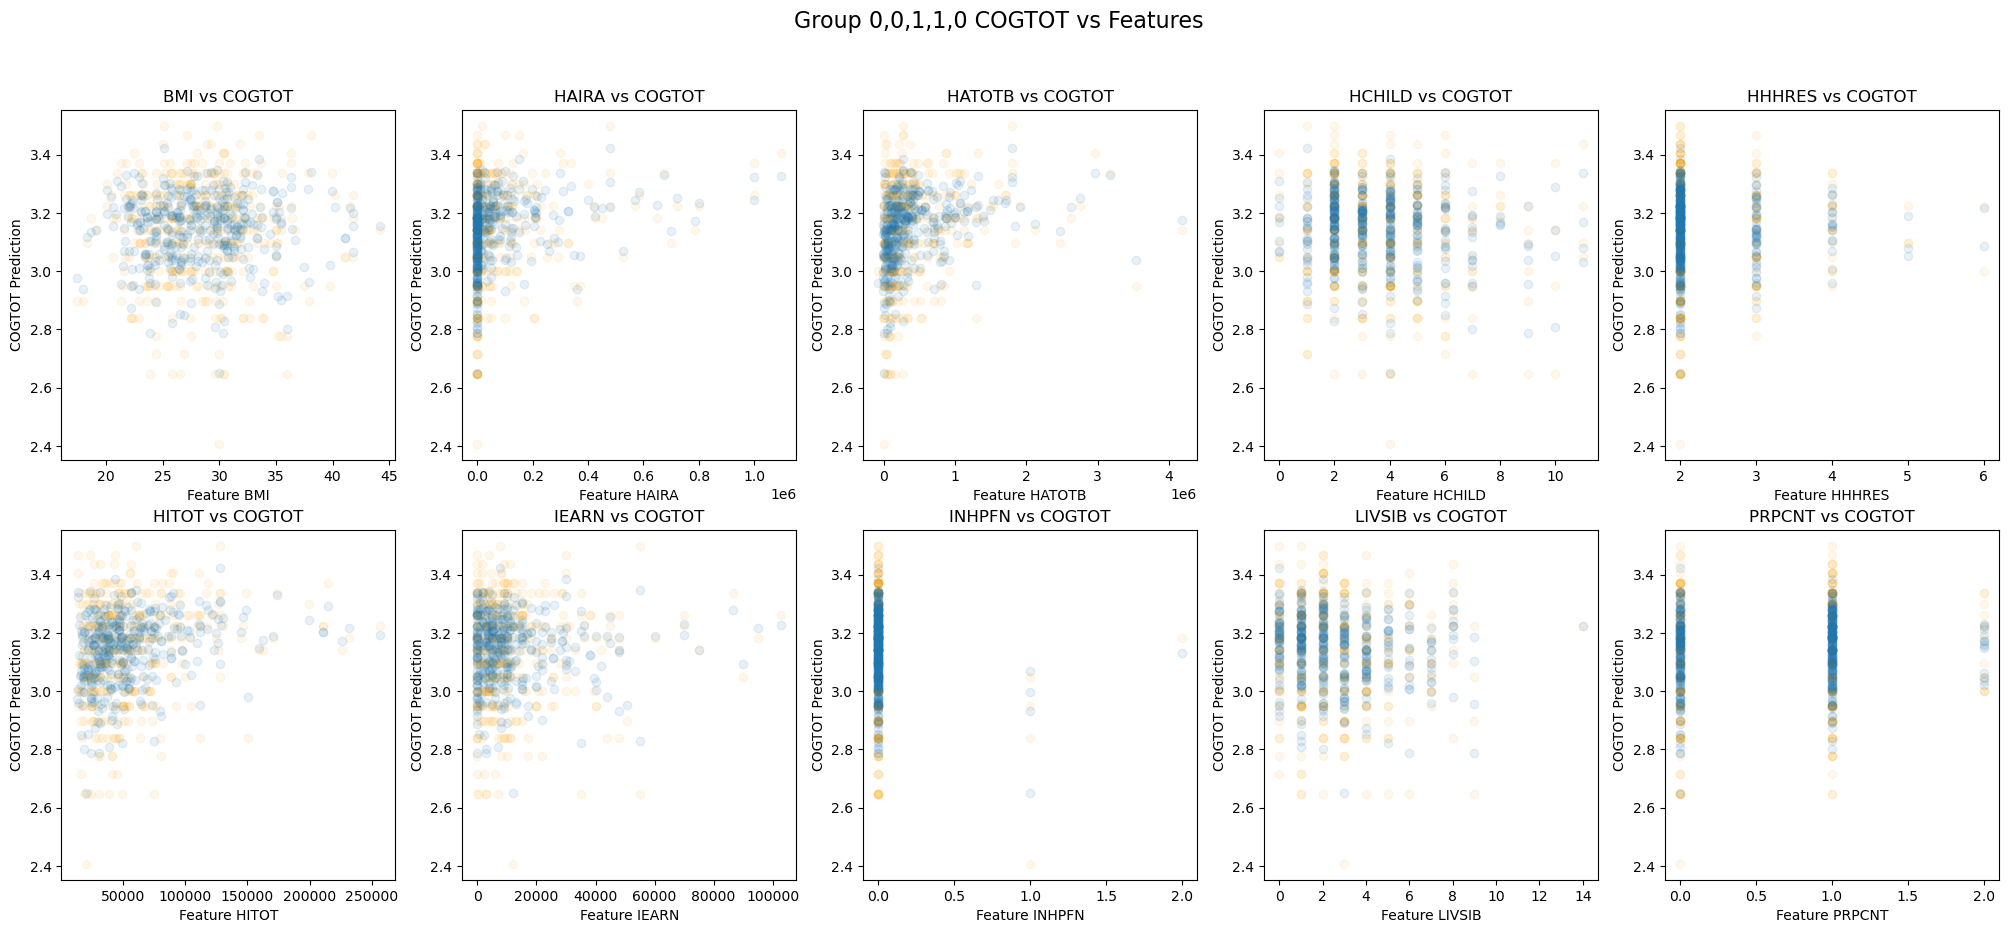

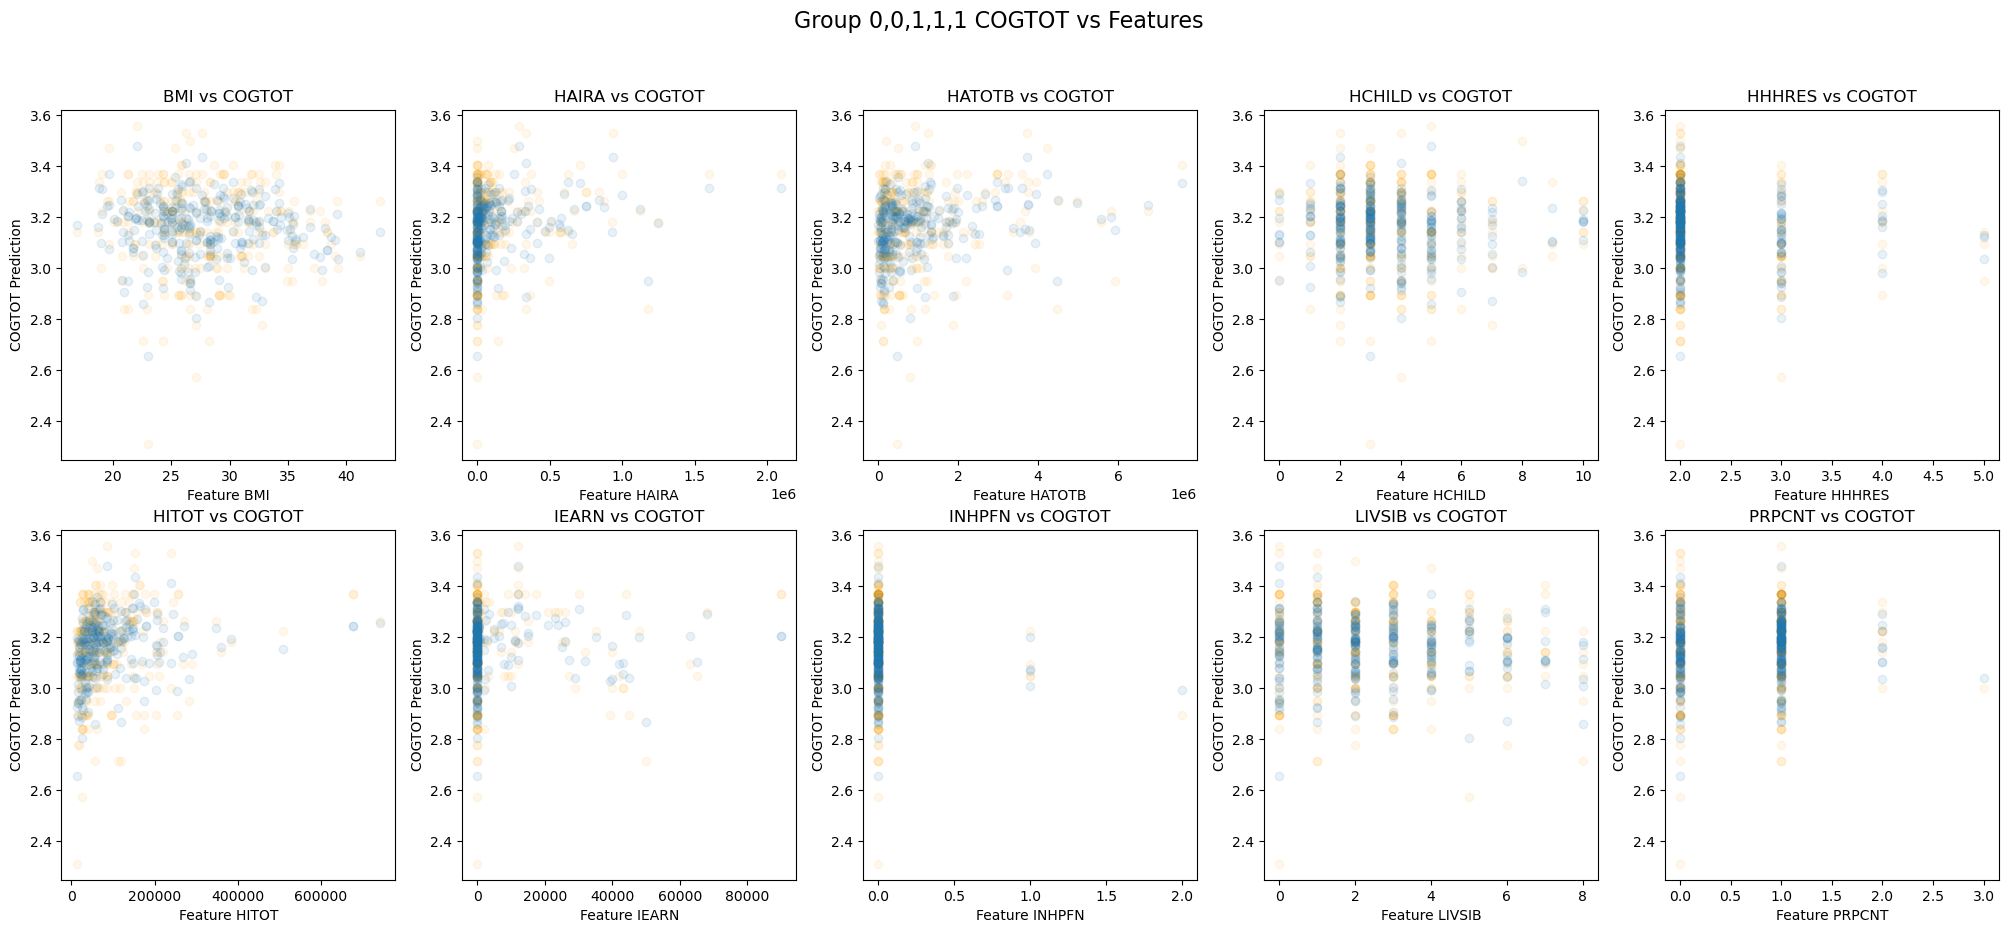

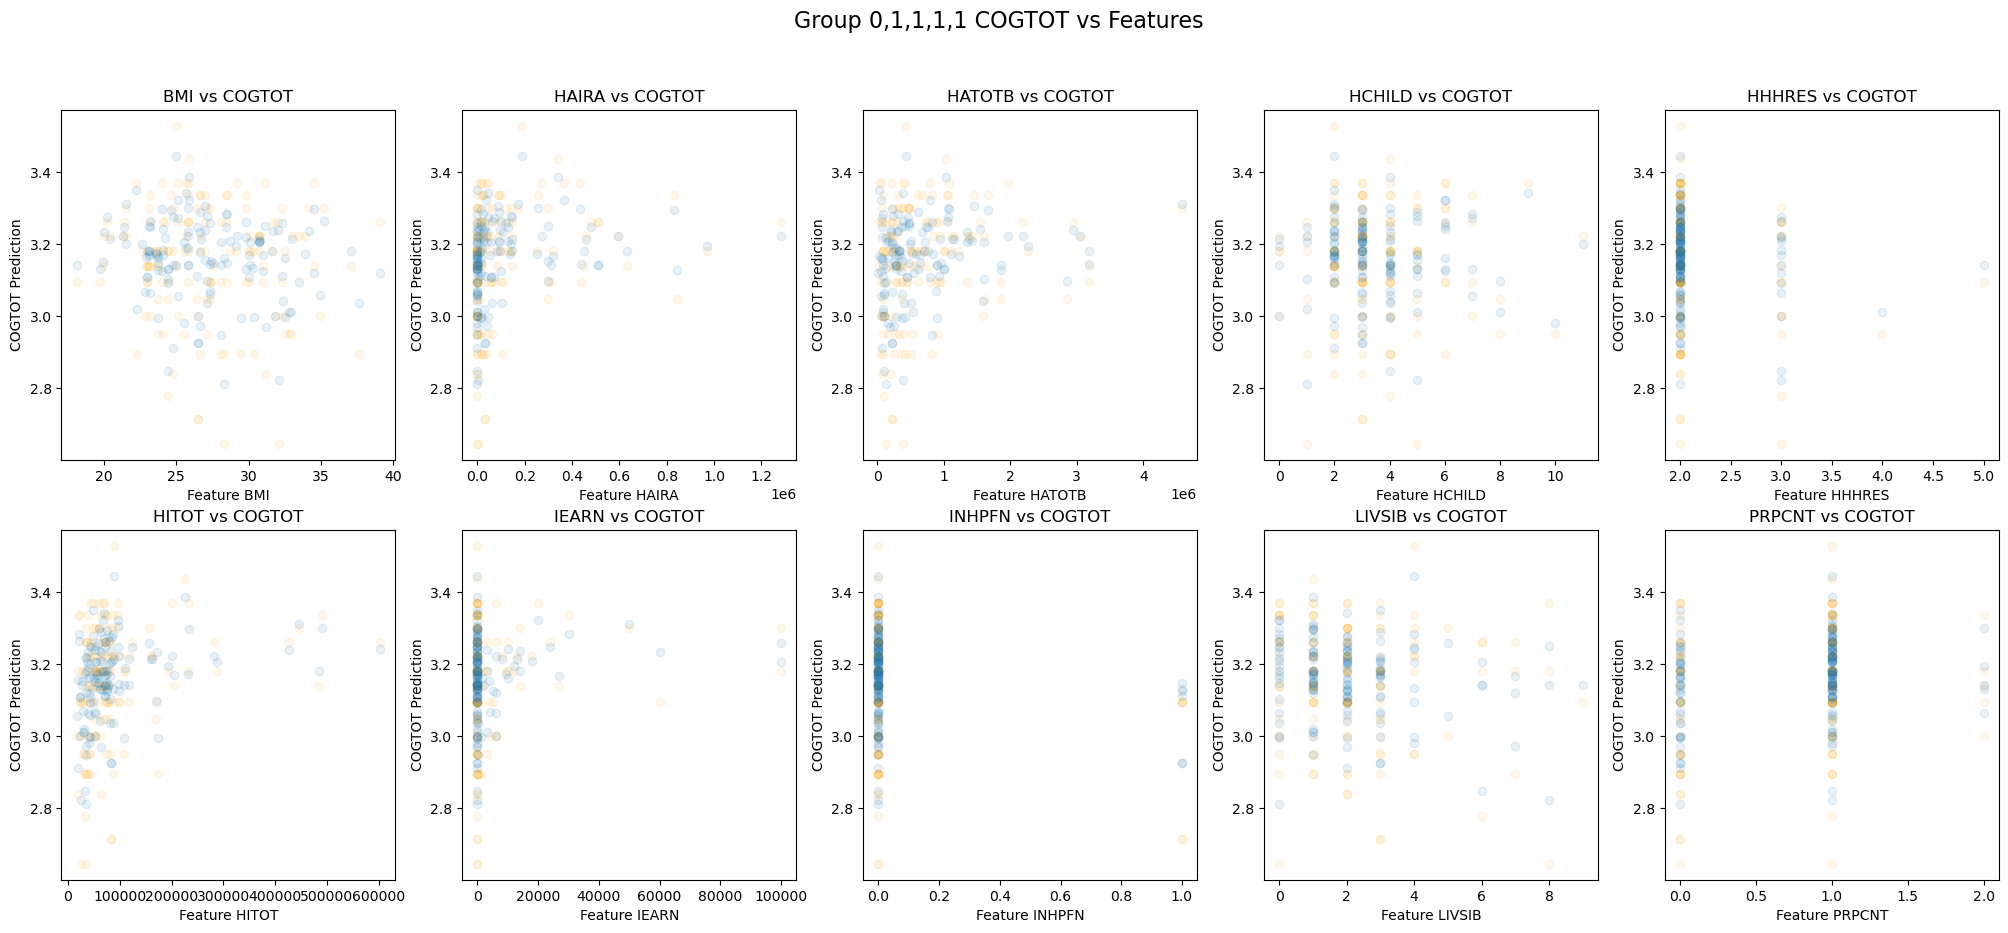

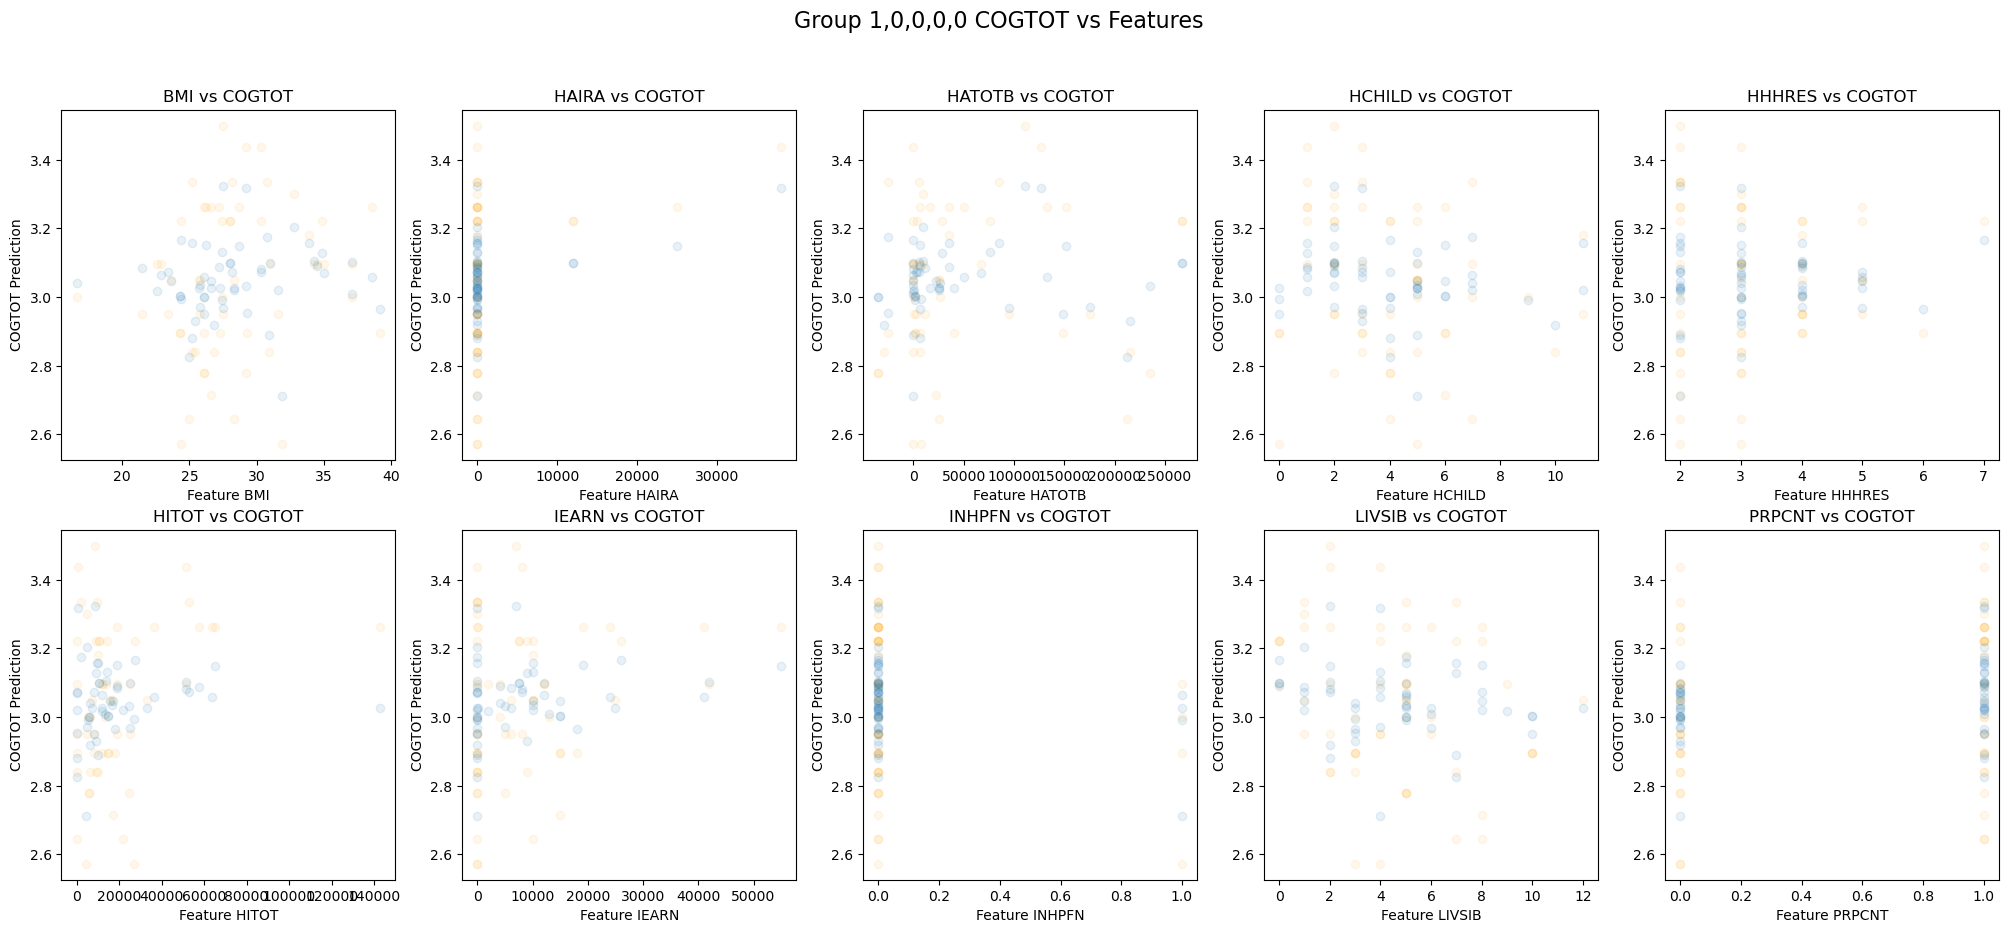

In [45]:
import numpy as np

def apply_function(x):
    return np.exp(x) - 0.1

for i in range(3):
    target = targets[i]
    for group in groups:
        if group in ["0,0,1,1,1", "0,1,1,1,1"]:
            X_train, X_test, y_train, y_test = train_test_split(df1[df1['group'] == group][features], df1[df1['group'] == group][targets], test_size=0.1, random_state=42)
            rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
        else:
            X_train, X_test, y_train, y_test = train_test_split(df2[df2['group'] == group][features], df2[df2['group'] == group][targets], test_size=0.1, random_state=42)
            if best_params_2[best_params_2['Group'] == group]['max_depth'].values[0] > 0:
                depth = int(best_params_2[best_params_2['Group'] == group]['max_depth'].values[0])
            else:
                depth = None
            rf = RandomForestRegressor(n_estimators=300, max_depth=depth, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        if group in ["0,0,1,1,1", "0,1,1,1,1"]:
            X_test_transformed = X_test.applymap(apply_function)
        else:
            X_test_transformed = X_test.apply(lambda x: apply_function(x) if x.name != 'HATOTB' else x)

        fig, ax = plt.subplots(2,5, figsize=(25,10))
        feature_count = 0
        for row in range(2):
            for col in range(5):
                ax[row][col].scatter(X_test_transformed[features[feature_count]], y_test[target], alpha = 0.08, color = "orange", label = "True Value")
                ax[row][col].scatter(X_test_transformed[features[feature_count]], y_pred[:,i], alpha = 0.1, label = "Predicted Value")
                ax[row][col].set_title(features[feature_count]+ " vs "+ targets[i])
                ax[row][col].set_xlabel("Feature " + features[feature_count])
                ax[row][col].set_ylabel(targets[i] + " Prediction")
                fig.suptitle('Group ' + str(group) + ' ' + target + ' vs '+ "Features", fontsize=16)
                feature_count += 1
        plt.savefig('scatterplot_input_vs_target\Group ' + str(group) + ' ' + targets[i] + ' vs '+ "Features")
        plt.show()
